Trees in the file:
['##Params;2', '##Params;1', '##Shapes;2', '##Shapes;1', '##Links;2', '##Links;1', 'CollectionTree;1', 'POOLContainer;1', 'POOLContainerForm;1', 'POOLCollectionTree;1', 'MetaData;1', 'MetaDataHdr;1', 'MetaDataHdrForm;1']
Branches in the tree:
['EventInfoAux.', 'BornLeptonsAux.', 'MET_TruthAux.', 'TruthBSMAux.', 'TruthBSMWithDecayParticlesAux.', 'TruthBSMWithDecayVerticesAux.', 'TruthBosonAux.', 'TruthBosonsWithDecayParticlesAux.', 'TruthBosonsWithDecayVerticesAux.', 'TruthBottomAux.', 'TruthElectronsAux.', 'TruthEventsAux.', 'TruthForwardProtonsAux.', 'TruthLHEParticlesAux.', 'TruthMuonsAux.', 'TruthNeutrinosAux.', 'TruthPhotonsAux.', 'TruthTausAux.', 'TruthTausWithDecayParticlesAux.', 'TruthTausWithDecayVerticesAux.', 'TruthTopAux.', 'AntiKt10TruthSoftDropBeta100Zcut10JetsAux.', 'AntiKt10TruthSoftDropBeta100Zcut10JetsAux./AntiKt10TruthSoftDropBeta100Zcut10JetsAux.xAOD::AuxContainerBase', 'AntiKt10TruthSoftDropBeta100Zcut10JetsAux./AntiKt10TruthSoftDropBeta100Zcut10J

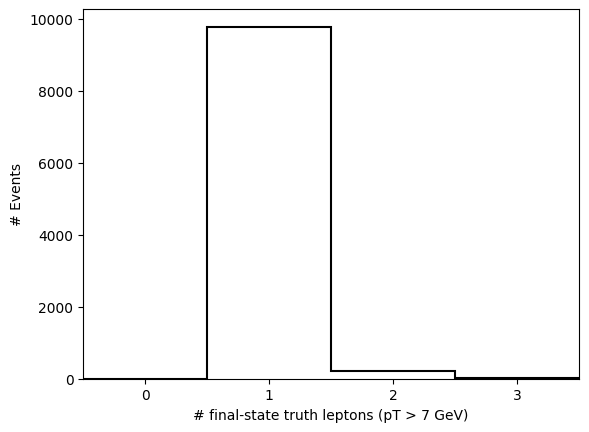

=== BSM Status Statistics ===
Minimum status: 1
Maximum status: 62
Mean status:    28.25
Median status:  22.0
Unique status values and counts:
  Status 1: 20000 entries
  Status 22: 20000 entries
  Status 23: 906 entries
  Status 62: 20000 entries



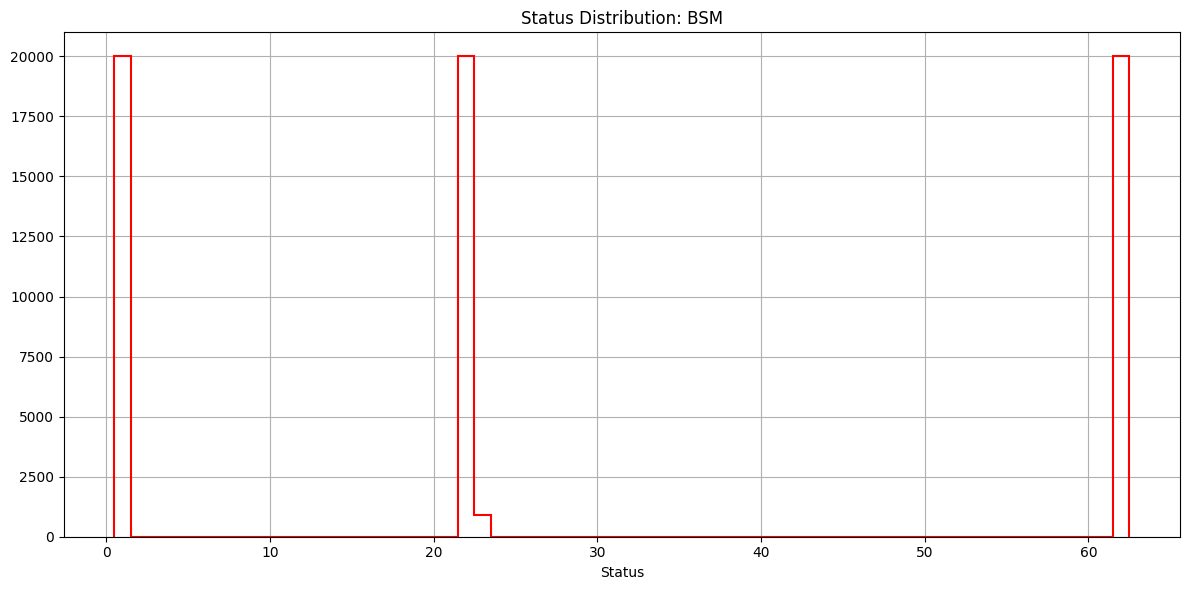

DataFrames summary:
Neutralino 1: (20000, 4)
Neutralino 2: (10000, 4)
Chargino pT:
  Count   : 10000
  Min     : 0.93
  Median  : 126.31
  Mean    : 149.78
  Std Dev : 105.24
  Max     : 1223.41

Chargino eta:
  Count   : 10000
  Min     : -5.48
  Median  : 0.01
  Mean    : 0.01
  Std Dev : 1.86
  Max     : 7.88

Chargino phi:
  Count   : 10000
  Min     : -3.14
  Median  : -0.01
  Mean    : -0.00
  Std Dev : 1.82
  Max     : 3.14

Neutralino 1 pT:
  Count   : 20000
  Min     : 0.51
  Median  : 75.13
  Mean    : 87.84
  Std Dev : 58.89
  Max     : 925.13

Neutralino 1 eta:
  Count   : 20000
  Min     : -6.02
  Median  : -0.01
  Mean    : -0.01
  Std Dev : 1.58
  Max     : 6.03

Neutralino 1 phi:
  Count   : 20000
  Min     : -3.14
  Median  : 0.01
  Mean    : 0.01
  Std Dev : 1.81
  Max     : 3.14

Neutralino 2 pT:
  Count   : 10000
  Min     : 0.93
  Median  : 126.19
  Mean    : 149.31
  Std Dev : 104.63
  Max     : 1223.41

Neutralino 2 eta:
  Count   : 10000
  Min     : -6.57
  Medi

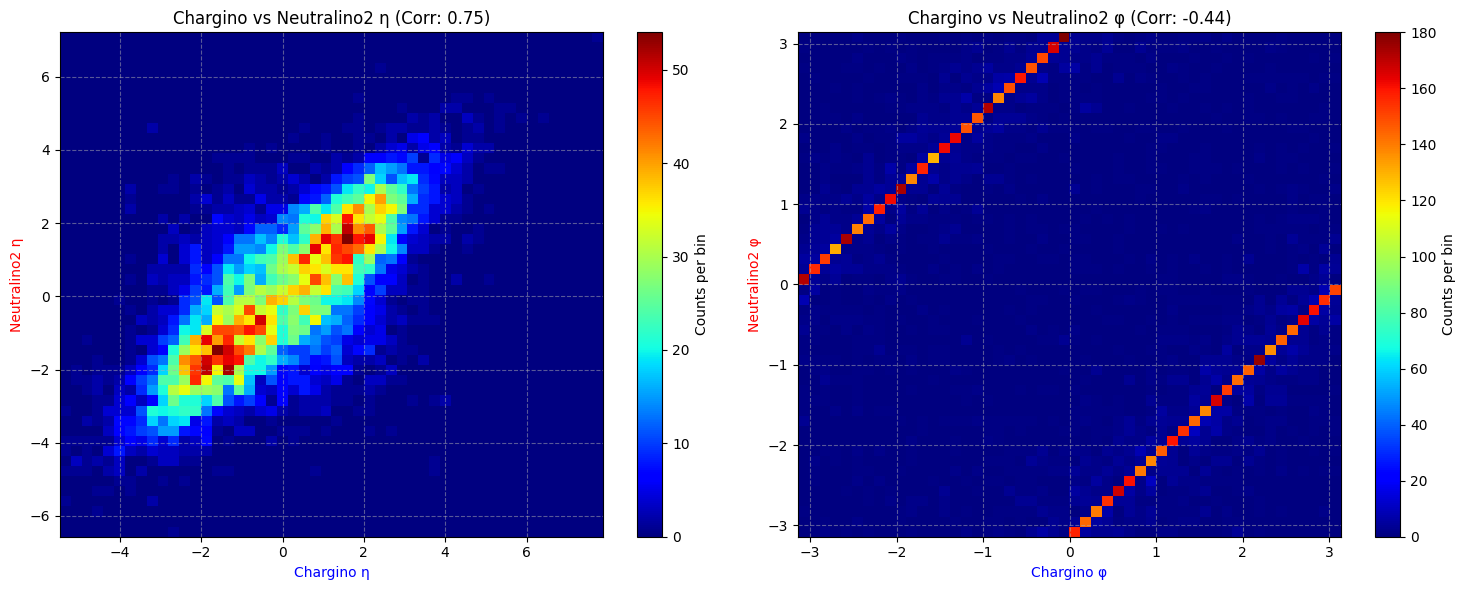

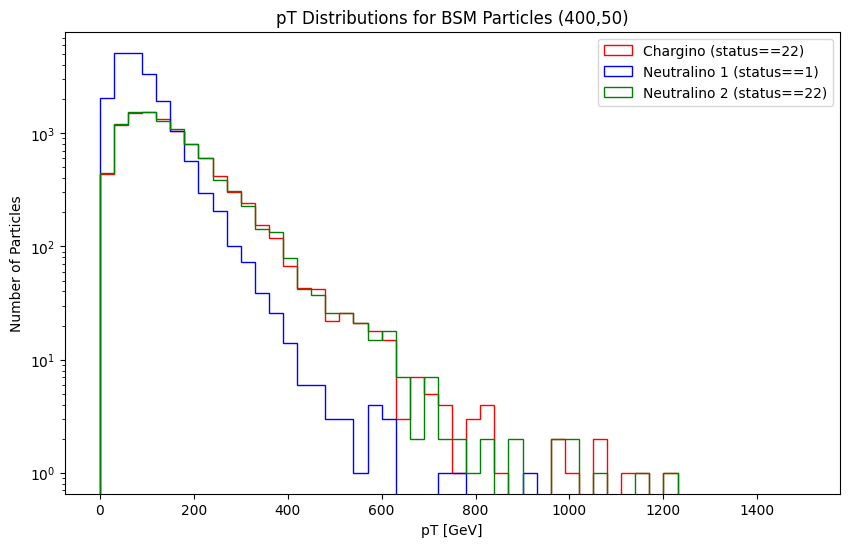

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import awkward as ak


# Open the ROOT file
file = uproot.open("/Users/ericballabene/user.caiy.Truth3.WB_v02.C1mN2_WZ_200_50_1L7_MadSpin_EXT0/user.caiy.43348808.EXT0._000001.DAOD_TRUTH3.root")

# Specify the tree name
tree_name = "CollectionTree;1"

# Access the tree
tree = file[tree_name]

# List all trees in the file
print("Trees in the file:")
print(file.keys())

# List all branches in the tree
print("Branches in the tree:")
print(tree.keys())

# Check the total number of events
print(f"Total number of events in the tree: {tree.num_entries}")


#-------------------------------------------------------
# arrays we need for electrons, muons
#-------------------------------------------------------
branches_electrons = [
    "TruthElectronsAuxDyn.px",
    "TruthElectronsAuxDyn.py",
    "TruthElectronsAuxDyn.pz",
    "TruthElectronsAuxDyn.e",
    "TruthElectronsAuxDyn.status"
]
branches_muons = [
    "TruthMuonsAuxDyn.px",
    "TruthMuonsAuxDyn.py",
    "TruthMuonsAuxDyn.pz",
    "TruthMuonsAuxDyn.e",
    "TruthMuonsAuxDyn.status"
]

arr_electrons = tree.arrays(branches_electrons, library="ak")
arr_muons     = tree.arrays(branches_muons,     library="ak")

#-------------------------------------------------------
# Compute electron, muon pT in MeV
#-------------------------------------------------------
px_ele = arr_electrons["TruthElectronsAuxDyn.px"]
py_ele = arr_electrons["TruthElectronsAuxDyn.py"]
pt_ele = np.sqrt(px_ele**2 + py_ele**2)

px_mu = arr_muons["TruthMuonsAuxDyn.px"]
py_mu = arr_muons["TruthMuonsAuxDyn.py"]
pt_mu = np.sqrt(px_mu**2 + py_mu**2)

#-------------------------------------------------------
# Require final-state leptons (status==1) with pT > 7 GeV
#-------------------------------------------------------
is_final_ele  = (arr_electrons["TruthElectronsAuxDyn.status"] == 1)
pass_pt_ele   = (pt_ele > 7000)  # in MeV
keep_ele_mask = is_final_ele & pass_pt_ele
#keep_ele_mask = is_final_ele

is_final_mu   = (arr_muons["TruthMuonsAuxDyn.status"] == 1)
pass_pt_mu    = (pt_mu > 7000)   # in MeV
keep_mu_mask  = is_final_mu & pass_pt_mu
#keep_mu_mask  = is_final_mu


#-------------------------------------------------------
# Count leptons per event
#-------------------------------------------------------
n_elec = ak.sum(keep_ele_mask, axis=1)
n_muon = ak.sum(keep_mu_mask,  axis=1)
n_lept = n_elec + n_muon

#-------------------------------------------------------
# Count number of events with 0, 1, 2, 3, 4, and 5+ leptons
#-------------------------------------------------------
n_events = len(n_lept)
n_0lep   = ak.sum(n_lept == 0)
n_1lep   = ak.sum(n_lept == 1)
n_2lep   = ak.sum(n_lept == 2)
n_3lep   = ak.sum(n_lept == 3)
n_4lep   = ak.sum(n_lept == 4)
n_5plus  = ak.sum(n_lept >= 5)

#-------------------------------------------------------
# Print event statistics
#-------------------------------------------------------
print(f"Total events in DAOD:         {n_events}")
print(f"Events with >=2 leptons (pT > 7 GeV): {n_2lep + n_3lep + n_4lep + n_5plus}")
print(f"Fraction passing 2-lepton cut: {100.0 * (n_2lep + n_3lep + n_4lep + n_5plus) / n_events:.2f}%")

print("\nDetailed Breakdown:")
print(f"  Events with  0 leptons: {n_0lep}")
print(f"  Events with  1 lepton : {n_1lep}")
print(f"  Events with  2 leptons: {n_2lep}")
print(f"  Events with  3 leptons: {n_3lep}")
print(f"  Events with  4 leptons: {n_4lep}")
print(f"  Events with  5+ leptons: {n_5plus}")

#-------------------------------------------------------
# Plot histogram of number of leptons per event
#-------------------------------------------------------
n_lept_np = ak.to_numpy(n_lept)

# Define bins for integer counts (ensuring correct placement)
bin_edges = np.arange(-0.5, max(n_lept_np) + 1.5, 1)  

# Create histogram
plt.hist(n_lept_np, bins=bin_edges, histtype='step', color='black', linewidth=1.5)

# Set x-axis ticks to exact integer values
plt.xticks(np.arange(0, max(n_lept_np) + 1, 1))

# Force x-axis and y-axis to start from 0
plt.xlim(-0.5, max(n_lept_np) + 0.5)
plt.ylim(0, None)

# Labels
plt.xlabel("# final-state truth leptons (pT > 7 GeV)")
plt.ylabel("# Events")

# Show plot
plt.show()






#-------------------------------------------------------
# Retrieve the status branches for bosons and BSM particles.
#
# For bosons, we use the branch from TruthBosonAuxDyn.
# For BSM particles, we use the branch from TruthBSMAuxDyn.
#-------------------------------------------------------
#branches_bos = ["TruthBosonAuxDyn.status"]
branches_bsm = ["TruthBSMAuxDyn.status"]

# Read the branches into awkward arrays.
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

#-------------------------------------------------------
# Flatten the jagged arrays to get one-dimensional arrays.
#-------------------------------------------------------
#status_bos = ak.flatten(arr_bos["TruthBosonAuxDyn.status"])
status_bsm = ak.flatten(arr_bsm["TruthBSMAuxDyn.status"])

# Convert the flattened arrays to NumPy arrays.
#status_bos_np = ak.to_numpy(status_bos)
status_bsm_np = ak.to_numpy(status_bsm)

#-------------------------------------------------------
# Compute basic statistics for the status arrays.
#-------------------------------------------------------
def print_statistics(name, array):
    unique_vals, counts = np.unique(array, return_counts=True)
    print(f"=== {name} Status Statistics ===")
    print(f"Minimum status: {np.min(array)}")
    print(f"Maximum status: {np.max(array)}")
    print(f"Mean status:    {np.mean(array):.2f}")
    print(f"Median status:  {np.median(array)}")
    print("Unique status values and counts:")
    for val, count in zip(unique_vals, counts):
        print(f"  Status {val}: {count} entries")
    print("")

#print_statistics("Boson", status_bos_np)
print_statistics("BSM", status_bsm_np)

#-------------------------------------------------------
# Plot the status distributions.
#-------------------------------------------------------
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6), sharey=True)

bins_bsm = np.arange(np.min(status_bsm_np) - 0.5, np.max(status_bsm_np) + 1.5, 1)
ax1.hist(status_bsm_np, bins=bins_bsm, histtype='step', color='red', linewidth=1.5)
ax1.set_title("Status Distribution: BSM")
ax1.set_xlabel("Status")
ax1.grid(True)

plt.tight_layout()
plt.show()



branches_bsm = [
    "TruthBSMAuxDyn.pdgId",
    "TruthBSMAuxDyn.px",
    "TruthBSMAuxDyn.py",
    "TruthBSMAuxDyn.pz",     
    "TruthBSMAuxDyn.status"
]

# --- Read branches using uproot ---
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

###########################
# Process BSM Data
###########################
# Compute transverse momentum (pT) in GeV for BSM:
pt_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                 arr_bsm["TruthBSMAuxDyn.py"]**2) / 1000.0

# Compute total momentum p (in GeV) for BSM:
p_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                arr_bsm["TruthBSMAuxDyn.py"]**2 +
                arr_bsm["TruthBSMAuxDyn.pz"]**2) / 1000.0

# Convert pz to GeV for BSM:
pz_bsm = arr_bsm["TruthBSMAuxDyn.pz"] / 1000.0

# Compute pseudorapidity (eta) for BSM:
eta_bsm = 0.5 * np.log((p_bsm + pz_bsm) / (p_bsm - pz_bsm))

# Compute azimuthal angle (phi) for BSM:
phi_bsm = np.arctan2(arr_bsm["TruthBSMAuxDyn.py"], arr_bsm["TruthBSMAuxDyn.px"])

# Flatten and convert BSM arrays to NumPy:
pdg_bsm_np    = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.pdgId"]))
status_bsm_np = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.status"]))
pt_bsm_np     = ak.to_numpy(ak.flatten(pt_bsm))
eta_bsm_np    = ak.to_numpy(ak.flatten(eta_bsm))
phi_bsm_np    = ak.to_numpy(ak.flatten(phi_bsm))

# Define masks for each BSM particle type based on PDG ID and status:
mask_chargino    = (np.abs(pdg_bsm_np) == 1000024) & (status_bsm_np == 22)
mask_neutralino1 = (np.abs(pdg_bsm_np) == 1000022) & (status_bsm_np == 1)
mask_neutralino2 = (np.abs(pdg_bsm_np) == 1000023) & (status_bsm_np == 22)

bsm_chargino    = {
    "pdgId": pdg_bsm_np[mask_chargino],
    "pt": pt_bsm_np[mask_chargino],
    "eta": eta_bsm_np[mask_chargino],
    "phi": phi_bsm_np[mask_chargino]
}
bsm_neutralino1 = {
    "pdgId": pdg_bsm_np[mask_neutralino1],
    "pt": pt_bsm_np[mask_neutralino1],
    "eta": eta_bsm_np[mask_neutralino1],
    "phi": phi_bsm_np[mask_neutralino1]
}
bsm_neutralino2 = {
    "pdgId": pdg_bsm_np[mask_neutralino2],
    "pt": pt_bsm_np[mask_neutralino2],
    "eta": eta_bsm_np[mask_neutralino2],
    "phi": phi_bsm_np[mask_neutralino2]
}


df_bsm_chargino_400_50 = pd.DataFrame(bsm_chargino)
df_bsm_neutralino1_400_50 = pd.DataFrame(bsm_neutralino1)
df_bsm_neutralino2_400_50 = pd.DataFrame(bsm_neutralino2)

print("DataFrames summary:")
print("Neutralino 1:", df_bsm_neutralino1_400_50.shape)
print("Neutralino 2:", df_bsm_neutralino2_400_50.shape)


def print_detailed_stats(label, array):
    if len(array) > 0:
        count = len(array)
        mn = np.min(array)
        med = np.median(array)
        mean = np.mean(array)
        std = np.std(array)
        mx = np.max(array)
        print(f"{label}:")
        print(f"  Count   : {count}")
        print(f"  Min     : {mn:.2f}")
        print(f"  Median  : {med:.2f}")
        print(f"  Mean    : {mean:.2f}")
        print(f"  Std Dev : {std:.2f}")
        print(f"  Max     : {mx:.2f}\n")
    else:
        print(f"{label}: No entries found.\n")
# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")
# Extract eta and phi for Chargino and Neutralino2
eta_chargino = df_bsm_chargino_400_50["eta"].values[:n_pairs_BSM]
eta_neu2 = df_bsm_neutralino2_400_50["eta"].values[:n_pairs_BSM]
phi_chargino = df_bsm_chargino_400_50["phi"].values[:n_pairs_BSM]
phi_neu2 = df_bsm_neutralino2_400_50["phi"].values[:n_pairs_BSM]

corr_eta_BSM = np.corrcoef(eta_chargino, eta_neu2)[0, 1]
corr_phi_BSM = np.corrcoef(phi_chargino, phi_neu2)[0, 1]

print_detailed_stats("Chargino pT", df_bsm_chargino_400_50["pt"])
print_detailed_stats("Chargino eta", df_bsm_chargino_400_50["eta"])
print_detailed_stats("Chargino phi", df_bsm_chargino_400_50["phi"])

print_detailed_stats("Neutralino 1 pT", df_bsm_neutralino1_400_50["pt"])
print_detailed_stats("Neutralino 1 eta", df_bsm_neutralino1_400_50["eta"])
print_detailed_stats("Neutralino 1 phi", df_bsm_neutralino1_400_50["phi"])

print_detailed_stats("Neutralino 2 pT", df_bsm_neutralino2_400_50["pt"])
print_detailed_stats("Neutralino 2 eta", df_bsm_neutralino2_400_50["eta"])
print_detailed_stats("Neutralino 2 phi", df_bsm_neutralino2_400_50["phi"])

# --- Plot histograms for bosons and BSM particles ---

# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")


# --- Create subplots ---
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between plots

# Bottom Left: 2D Histogram for Chargino η vs Neutralino2 η
im2 = axs[0].hist2d(eta_chargino, eta_neu2, bins=50, cmap='jet', density=False)
cbar2 = fig.colorbar(im2[3], ax=axs[0])
cbar2.set_label("Counts per bin")
axs[0].set_xlabel("Chargino η", color='blue')
axs[0].set_ylabel("Neutralino2 η", color='red')
axs[0].set_title(f"Chargino vs Neutralino2 η (Corr: {corr_eta_BSM:.2f})")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Bottom Right: 2D Histogram for Chargino φ vs Neutralino2 φ
im3 = axs[1].hist2d(phi_chargino, phi_neu2, bins=50, cmap='jet', density=False)
cbar3 = fig.colorbar(im3[3], ax=axs[1])
cbar3.set_label("Counts per bin")
axs[1].set_xlabel("Chargino φ", color='blue')
axs[1].set_ylabel("Neutralino2 φ", color='red')
axs[1].set_title(f"Chargino vs Neutralino2 φ (Corr: {corr_phi_BSM:.2f})")
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
plt.hist(df_bsm_chargino_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='red', label="Chargino (status==22)")
plt.hist(df_bsm_neutralino1_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='blue', label="Neutralino 1 (status==1)")
plt.hist(df_bsm_neutralino2_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='green', label="Neutralino 2 (status==22)")
plt.xlabel('pT [GeV]')
plt.ylabel('Number of Particles')
plt.title('pT Distributions for BSM Particles (400,50)')
plt.yscale('log')
plt.legend()
plt.show()

Trees in the file:
['##Params;3', '##Params;2', '##Shapes;3', '##Shapes;2', '##Links;3', '##Links;2', 'MetaData;1', 'MetaDataHdr;1', 'MetaDataHdrForm;1', 'CollectionTree;1', 'POOLContainer;1', 'POOLContainerForm;1', 'POOLCollectionTree;1']
Branches in the tree:
['xTrigDecisionAux.', 'METAssoc_AntiKt4EMPFlowAux.', 'METAssoc_AntiKt4EMTopoAux.', 'EventInfoAux.', 'Kt4EMPFlowEventShapeAux.', 'Kt4EMPFlowNeutEventShapeAux.', 'Kt4EMPFlowPUSBEventShapeAux.', 'Kt4EMTopoOriginEventShapeAux.', 'TopoClusterIsoCentralEventShapeAux.', 'TopoClusterIsoForwardEventShapeAux.', 'BTagging_AntiKt4EMPFlowAux.', 'BTagging_AntiKtVR30Rmax4Rmin02TrackAux.', 'BornLeptonsAux.', 'CombinedMuonTrackParticlesAux.', 'DiTauJetsAux.', 'DiTauJetsLowPtAux.', 'ElectronsAux.', 'ExtrapolatedMuonTrackParticlesAux.', 'FourLeptonVerticesAux.', 'GSFConversionVerticesAux.', 'GSFTrackParticlesAux.', 'HLT_xAOD__BTaggingContainer_HLTBjetFexAux.', 'HLT_xAOD__TrigMissingETContainer_TrigEFMissingETAux.', 'HLT_xAOD__TrigMissingETContaine

=== BSM Status Statistics ===
Minimum status: 1
Maximum status: 62
Mean status:    28.26
Median status:  22.0
Unique status values and counts:
  Status 1: 80000 entries
  Status 22: 79993 entries
  Status 23: 3667 entries
  Status 44: 56 entries
  Status 62: 80000 entries



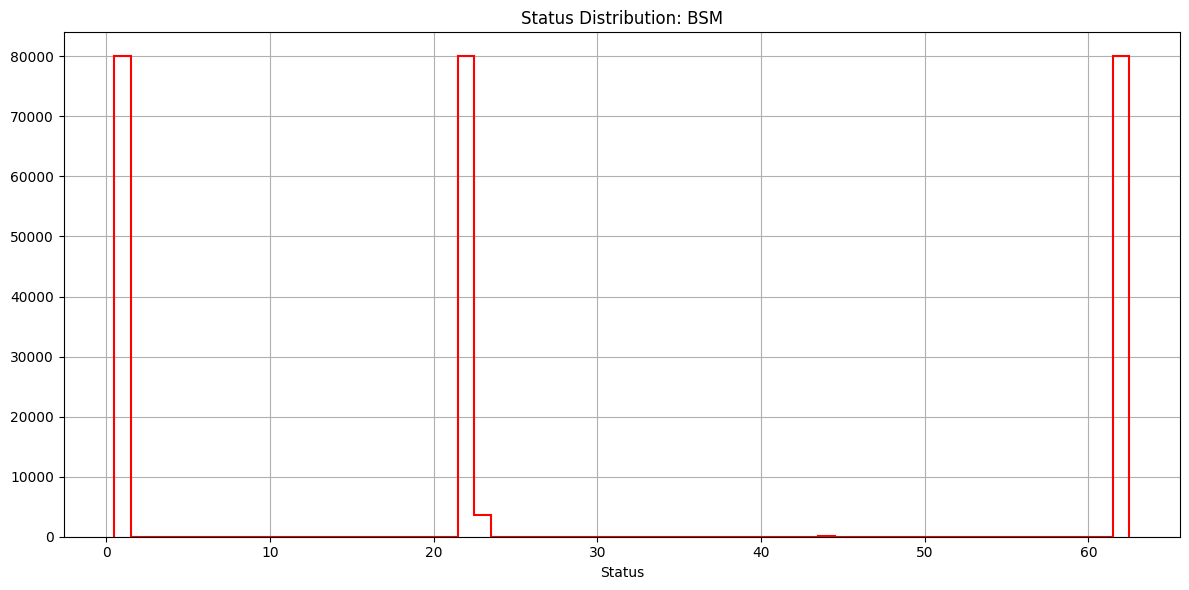

DataFrames summary:
Neutralino 1: (80000, 4)
Neutralino 2: (39997, 4)
Chargino pT:
  Count   : 39996
  Min     : 0.91
  Median  : 142.30
  Mean    : 168.03
  Std Dev : 117.50
  Max     : 1341.59

Chargino eta:
  Count   : 39996
  Min     : -7.69
  Median  : -0.01
  Mean    : -0.01
  Std Dev : 1.79
  Max     : 6.44

Chargino phi:
  Count   : 39996
  Min     : -3.14
  Median  : 0.03
  Mean    : 0.01
  Std Dev : 1.81
  Max     : 3.14

Neutralino 1 pT:
  Count   : 80000
  Min     : 0.10
  Median  : 68.15
  Mean    : 83.50
  Std Dev : 62.56
  Max     : 986.54

Neutralino 1 eta:
  Count   : 80000
  Min     : -6.30
  Median  : -0.00
  Mean    : -0.00
  Std Dev : 1.59
  Max     : 7.61

Neutralino 1 phi:
  Count   : 80000
  Min     : -3.14
  Median  : 0.00
  Mean    : 0.00
  Std Dev : 1.81
  Max     : 3.14

Neutralino 2 pT:
  Count   : 39997
  Min     : 0.91
  Median  : 141.98
  Mean    : 167.91
  Std Dev : 118.12
  Max     : 1381.41

Neutralino 2 eta:
  Count   : 39997
  Min     : -7.33
  Medi

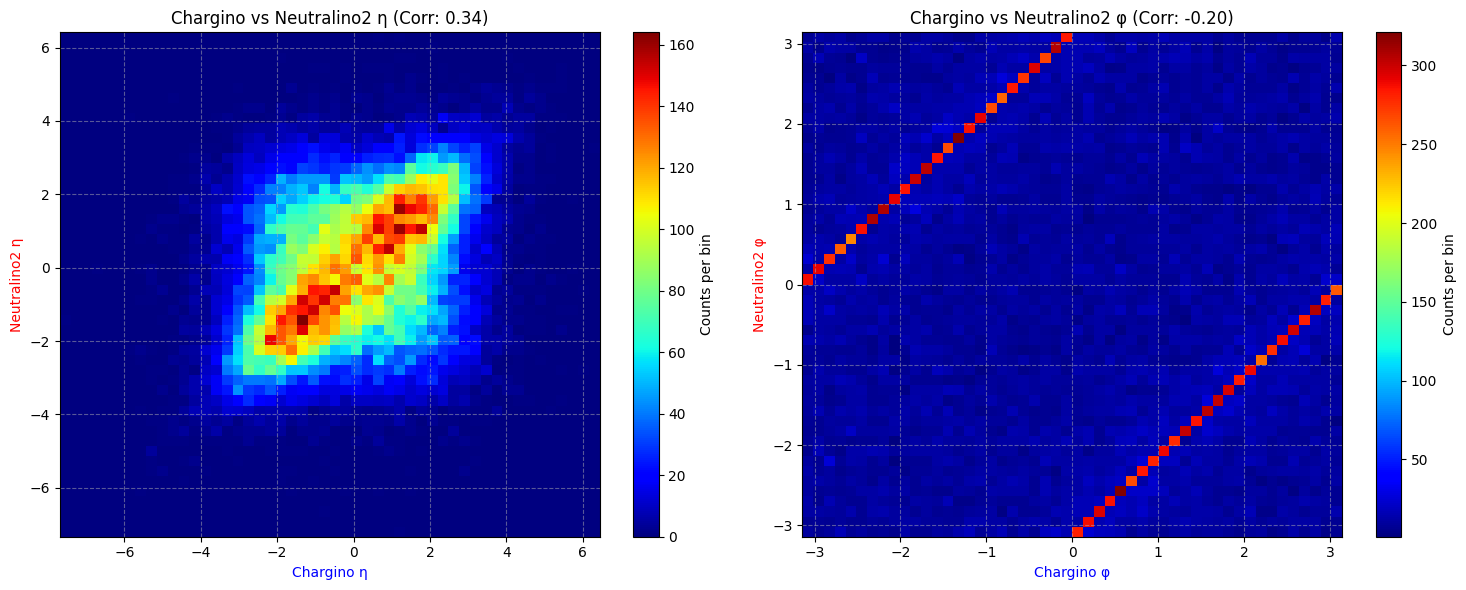

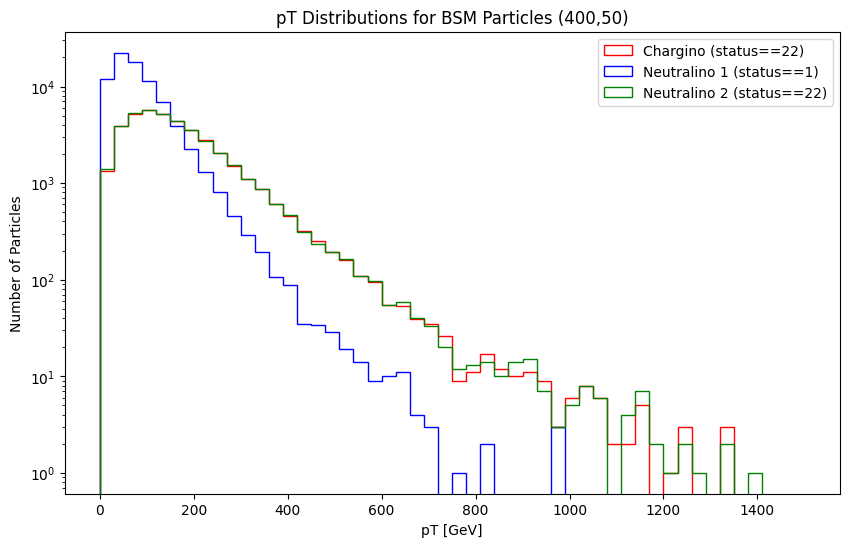

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import awkward as ak


# Open the ROOT file
file = uproot.open("/Users/ericballabene/mc20_13TeV.545834.MGPy8EG_C1mN2_Wh_200_50_1L20orXe_MadSpin.deriv.DAOD_PHYS.e8566_a907_r14859_p6452/DAOD_PHYS.41523882._000003.pool.root.1")



# Specify the tree name
tree_name = "CollectionTree;1"

# Access the tree
tree = file[tree_name]

# List all trees in the file
print("Trees in the file:")
print(file.keys())

# List all branches in the tree
print("Branches in the tree:")
print(tree.keys())

# Check the total number of events
print(f"Total number of events in the tree: {tree.num_entries}")


#-------------------------------------------------------
# arrays we need for electrons, muons
#-------------------------------------------------------
branches_electrons = [
    "TruthElectronsAuxDyn.px",
    "TruthElectronsAuxDyn.py",
    "TruthElectronsAuxDyn.pz",
    "TruthElectronsAuxDyn.e",
    "TruthElectronsAuxDyn.status"
]
branches_muons = [
    "TruthMuonsAuxDyn.px",
    "TruthMuonsAuxDyn.py",
    "TruthMuonsAuxDyn.pz",
    "TruthMuonsAuxDyn.e",
    "TruthMuonsAuxDyn.status"
]

arr_electrons = tree.arrays(branches_electrons, library="ak")
arr_muons     = tree.arrays(branches_muons,     library="ak")

#-------------------------------------------------------
# Compute electron, muon pT in MeV
#-------------------------------------------------------
px_ele = arr_electrons["TruthElectronsAuxDyn.px"]
py_ele = arr_electrons["TruthElectronsAuxDyn.py"]
pt_ele = np.sqrt(px_ele**2 + py_ele**2)

px_mu = arr_muons["TruthMuonsAuxDyn.px"]
py_mu = arr_muons["TruthMuonsAuxDyn.py"]
pt_mu = np.sqrt(px_mu**2 + py_mu**2)

#-------------------------------------------------------
# Require final-state leptons (status==1) with pT > 7 GeV
#-------------------------------------------------------
is_final_ele  = (arr_electrons["TruthElectronsAuxDyn.status"] == 1)
pass_pt_ele   = (pt_ele > 7000)  # in MeV
keep_ele_mask = is_final_ele & pass_pt_ele
#keep_ele_mask = is_final_ele

is_final_mu   = (arr_muons["TruthMuonsAuxDyn.status"] == 1)
pass_pt_mu    = (pt_mu > 7000)   # in MeV
keep_mu_mask  = is_final_mu & pass_pt_mu
#keep_mu_mask  = is_final_mu


#-------------------------------------------------------
# Count leptons per event
#-------------------------------------------------------
n_elec = ak.sum(keep_ele_mask, axis=1)
n_muon = ak.sum(keep_mu_mask,  axis=1)
n_lept = n_elec + n_muon

#-------------------------------------------------------
# Count number of events with 0, 1, 2, 3, 4, and 5+ leptons
#-------------------------------------------------------
n_events = len(n_lept)
n_0lep   = ak.sum(n_lept == 0)
n_1lep   = ak.sum(n_lept == 1)
n_2lep   = ak.sum(n_lept == 2)
n_3lep   = ak.sum(n_lept == 3)
n_4lep   = ak.sum(n_lept == 4)
n_5plus  = ak.sum(n_lept >= 5)

#-------------------------------------------------------
# Print event statistics
#-------------------------------------------------------
print(f"Total events in DAOD:         {n_events}")
print(f"Events with >=2 leptons (pT > 7 GeV): {n_2lep + n_3lep + n_4lep + n_5plus}")
print(f"Fraction passing 2-lepton cut: {100.0 * (n_2lep + n_3lep + n_4lep + n_5plus) / n_events:.2f}%")

print("\nDetailed Breakdown:")
print(f"  Events with  0 leptons: {n_0lep}")
print(f"  Events with  1 lepton : {n_1lep}")
print(f"  Events with  2 leptons: {n_2lep}")
print(f"  Events with  3 leptons: {n_3lep}")
print(f"  Events with  4 leptons: {n_4lep}")
print(f"  Events with  5+ leptons: {n_5plus}")

#-------------------------------------------------------
# Plot histogram of number of leptons per event
#-------------------------------------------------------
n_lept_np = ak.to_numpy(n_lept)

# Define bins for integer counts (ensuring correct placement)
bin_edges = np.arange(-0.5, max(n_lept_np) + 1.5, 1)  

# Create histogram
plt.hist(n_lept_np, bins=bin_edges, histtype='step', color='black', linewidth=1.5)

# Set x-axis ticks to exact integer values
plt.xticks(np.arange(0, max(n_lept_np) + 1, 1))

# Force x-axis and y-axis to start from 0
plt.xlim(-0.5, max(n_lept_np) + 0.5)
plt.ylim(0, None)

# Labels
plt.xlabel("# final-state truth leptons (pT > 7 GeV)")
plt.ylabel("# Events")

# Show plot
plt.show()






#-------------------------------------------------------
# Retrieve the status branches for bosons and BSM particles.
#
# For bosons, we use the branch from TruthBosonAuxDyn.
# For BSM particles, we use the branch from TruthBSMAuxDyn.
#-------------------------------------------------------
#branches_bos = ["TruthBosonAuxDyn.status"]
branches_bsm = ["TruthBSMAuxDyn.status"]

# Read the branches into awkward arrays.
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

#-------------------------------------------------------
# Flatten the jagged arrays to get one-dimensional arrays.
#-------------------------------------------------------
#status_bos = ak.flatten(arr_bos["TruthBosonAuxDyn.status"])
status_bsm = ak.flatten(arr_bsm["TruthBSMAuxDyn.status"])

# Convert the flattened arrays to NumPy arrays.
#status_bos_np = ak.to_numpy(status_bos)
status_bsm_np = ak.to_numpy(status_bsm)

#-------------------------------------------------------
# Compute basic statistics for the status arrays.
#-------------------------------------------------------
def print_statistics(name, array):
    unique_vals, counts = np.unique(array, return_counts=True)
    print(f"=== {name} Status Statistics ===")
    print(f"Minimum status: {np.min(array)}")
    print(f"Maximum status: {np.max(array)}")
    print(f"Mean status:    {np.mean(array):.2f}")
    print(f"Median status:  {np.median(array)}")
    print("Unique status values and counts:")
    for val, count in zip(unique_vals, counts):
        print(f"  Status {val}: {count} entries")
    print("")

#print_statistics("Boson", status_bos_np)
print_statistics("BSM", status_bsm_np)

#-------------------------------------------------------
# Plot the status distributions.
#-------------------------------------------------------
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6), sharey=True)

bins_bsm = np.arange(np.min(status_bsm_np) - 0.5, np.max(status_bsm_np) + 1.5, 1)
ax1.hist(status_bsm_np, bins=bins_bsm, histtype='step', color='red', linewidth=1.5)
ax1.set_title("Status Distribution: BSM")
ax1.set_xlabel("Status")
ax1.grid(True)

plt.tight_layout()
plt.show()



branches_bsm = [
    "TruthBSMAuxDyn.pdgId",
    "TruthBSMAuxDyn.px",
    "TruthBSMAuxDyn.py",
    "TruthBSMAuxDyn.pz",     
    "TruthBSMAuxDyn.status"
]

# --- Read branches using uproot ---
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

###########################
# Process BSM Data
###########################
# Compute transverse momentum (pT) in GeV for BSM:
pt_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                 arr_bsm["TruthBSMAuxDyn.py"]**2) / 1000.0

# Compute total momentum p (in GeV) for BSM:
p_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                arr_bsm["TruthBSMAuxDyn.py"]**2 +
                arr_bsm["TruthBSMAuxDyn.pz"]**2) / 1000.0

# Convert pz to GeV for BSM:
pz_bsm = arr_bsm["TruthBSMAuxDyn.pz"] / 1000.0

# Compute pseudorapidity (eta) for BSM:
eta_bsm = 0.5 * np.log((p_bsm + pz_bsm) / (p_bsm - pz_bsm))

# Compute azimuthal angle (phi) for BSM:
phi_bsm = np.arctan2(arr_bsm["TruthBSMAuxDyn.py"], arr_bsm["TruthBSMAuxDyn.px"])

# Flatten and convert BSM arrays to NumPy:
pdg_bsm_np    = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.pdgId"]))
status_bsm_np = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.status"]))
pt_bsm_np     = ak.to_numpy(ak.flatten(pt_bsm))
eta_bsm_np    = ak.to_numpy(ak.flatten(eta_bsm))
phi_bsm_np    = ak.to_numpy(ak.flatten(phi_bsm))

# Define masks for each BSM particle type based on PDG ID and status:
mask_chargino    = (np.abs(pdg_bsm_np) == 1000024) & (status_bsm_np == 22)
mask_neutralino1 = (np.abs(pdg_bsm_np) == 1000022) & (status_bsm_np == 1)
mask_neutralino2 = (np.abs(pdg_bsm_np) == 1000023) & (status_bsm_np == 22)

bsm_chargino    = {
    "pdgId": pdg_bsm_np[mask_chargino],
    "pt": pt_bsm_np[mask_chargino],
    "eta": eta_bsm_np[mask_chargino],
    "phi": phi_bsm_np[mask_chargino]
}
bsm_neutralino1 = {
    "pdgId": pdg_bsm_np[mask_neutralino1],
    "pt": pt_bsm_np[mask_neutralino1],
    "eta": eta_bsm_np[mask_neutralino1],
    "phi": phi_bsm_np[mask_neutralino1]
}
bsm_neutralino2 = {
    "pdgId": pdg_bsm_np[mask_neutralino2],
    "pt": pt_bsm_np[mask_neutralino2],
    "eta": eta_bsm_np[mask_neutralino2],
    "phi": phi_bsm_np[mask_neutralino2]
}


df_bsm_chargino_400_50 = pd.DataFrame(bsm_chargino)
df_bsm_neutralino1_400_50 = pd.DataFrame(bsm_neutralino1)
df_bsm_neutralino2_400_50 = pd.DataFrame(bsm_neutralino2)

print("DataFrames summary:")
print("Neutralino 1:", df_bsm_neutralino1_400_50.shape)
print("Neutralino 2:", df_bsm_neutralino2_400_50.shape)


def print_detailed_stats(label, array):
    if len(array) > 0:
        count = len(array)
        mn = np.min(array)
        med = np.median(array)
        mean = np.mean(array)
        std = np.std(array)
        mx = np.max(array)
        print(f"{label}:")
        print(f"  Count   : {count}")
        print(f"  Min     : {mn:.2f}")
        print(f"  Median  : {med:.2f}")
        print(f"  Mean    : {mean:.2f}")
        print(f"  Std Dev : {std:.2f}")
        print(f"  Max     : {mx:.2f}\n")
    else:
        print(f"{label}: No entries found.\n")
# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")
# Extract eta and phi for Chargino and Neutralino2
eta_chargino = df_bsm_chargino_400_50["eta"].values[:n_pairs_BSM]
eta_neu2 = df_bsm_neutralino2_400_50["eta"].values[:n_pairs_BSM]
phi_chargino = df_bsm_chargino_400_50["phi"].values[:n_pairs_BSM]
phi_neu2 = df_bsm_neutralino2_400_50["phi"].values[:n_pairs_BSM]

corr_eta_BSM = np.corrcoef(eta_chargino, eta_neu2)[0, 1]
corr_phi_BSM = np.corrcoef(phi_chargino, phi_neu2)[0, 1]

print_detailed_stats("Chargino pT", df_bsm_chargino_400_50["pt"])
print_detailed_stats("Chargino eta", df_bsm_chargino_400_50["eta"])
print_detailed_stats("Chargino phi", df_bsm_chargino_400_50["phi"])

print_detailed_stats("Neutralino 1 pT", df_bsm_neutralino1_400_50["pt"])
print_detailed_stats("Neutralino 1 eta", df_bsm_neutralino1_400_50["eta"])
print_detailed_stats("Neutralino 1 phi", df_bsm_neutralino1_400_50["phi"])

print_detailed_stats("Neutralino 2 pT", df_bsm_neutralino2_400_50["pt"])
print_detailed_stats("Neutralino 2 eta", df_bsm_neutralino2_400_50["eta"])
print_detailed_stats("Neutralino 2 phi", df_bsm_neutralino2_400_50["phi"])

# --- Plot histograms for bosons and BSM particles ---

# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")


# --- Create subplots ---
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between plots

# Bottom Left: 2D Histogram for Chargino η vs Neutralino2 η
im2 = axs[0].hist2d(eta_chargino, eta_neu2, bins=50, cmap='jet', density=False)
cbar2 = fig.colorbar(im2[3], ax=axs[0])
cbar2.set_label("Counts per bin")
axs[0].set_xlabel("Chargino η", color='blue')
axs[0].set_ylabel("Neutralino2 η", color='red')
axs[0].set_title(f"Chargino vs Neutralino2 η (Corr: {corr_eta_BSM:.2f})")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Bottom Right: 2D Histogram for Chargino φ vs Neutralino2 φ
im3 = axs[1].hist2d(phi_chargino, phi_neu2, bins=50, cmap='jet', density=False)
cbar3 = fig.colorbar(im3[3], ax=axs[1])
cbar3.set_label("Counts per bin")
axs[1].set_xlabel("Chargino φ", color='blue')
axs[1].set_ylabel("Neutralino2 φ", color='red')
axs[1].set_title(f"Chargino vs Neutralino2 φ (Corr: {corr_phi_BSM:.2f})")
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
plt.hist(df_bsm_chargino_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='red', label="Chargino (status==22)")
plt.hist(df_bsm_neutralino1_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='blue', label="Neutralino 1 (status==1)")
plt.hist(df_bsm_neutralino2_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='green', label="Neutralino 2 (status==22)")
plt.xlabel('pT [GeV]')
plt.ylabel('Number of Particles')
plt.title('pT Distributions for BSM Particles (400,50)')
plt.yscale('log')
plt.legend()
plt.show()

Trees in the file:
['##Params;2', '##Params;1', '##Shapes;2', '##Shapes;1', '##Links;2', '##Links;1', 'CollectionTree;1', 'POOLContainer;1', 'POOLContainerForm;1', 'POOLCollectionTree;1', 'MetaData;1', 'MetaDataHdr;1', 'MetaDataHdrForm;1']
Branches in the tree:
['EventInfoAux.', 'BornLeptonsAux.', 'MET_TruthAux.', 'TruthBSMAux.', 'TruthBSMWithDecayParticlesAux.', 'TruthBSMWithDecayVerticesAux.', 'TruthBosonAux.', 'TruthBosonsWithDecayParticlesAux.', 'TruthBosonsWithDecayVerticesAux.', 'TruthBottomAux.', 'TruthElectronsAux.', 'TruthEventsAux.', 'TruthForwardProtonsAux.', 'TruthLHEParticlesAux.', 'TruthMuonsAux.', 'TruthNeutrinosAux.', 'TruthPhotonsAux.', 'TruthTausAux.', 'TruthTausWithDecayParticlesAux.', 'TruthTausWithDecayVerticesAux.', 'TruthTopAux.', 'AntiKt10TruthSoftDropBeta100Zcut10JetsAux.', 'AntiKt10TruthSoftDropBeta100Zcut10JetsAux./AntiKt10TruthSoftDropBeta100Zcut10JetsAux.xAOD::AuxContainerBase', 'AntiKt10TruthSoftDropBeta100Zcut10JetsAux./AntiKt10TruthSoftDropBeta100Zcut10J

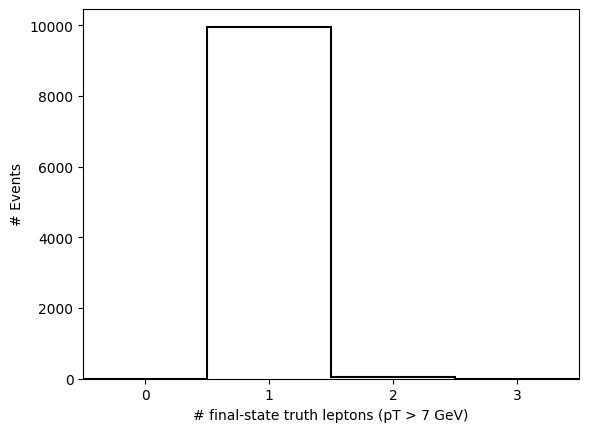

=== BSM Status Statistics ===
Minimum status: 1
Maximum status: 62
Mean status:    28.07
Median status:  22.0
Unique status values and counts:
  Status 1: 20000 entries
  Status 22: 20000 entries
  Status 23: 3151 entries
  Status 62: 20000 entries



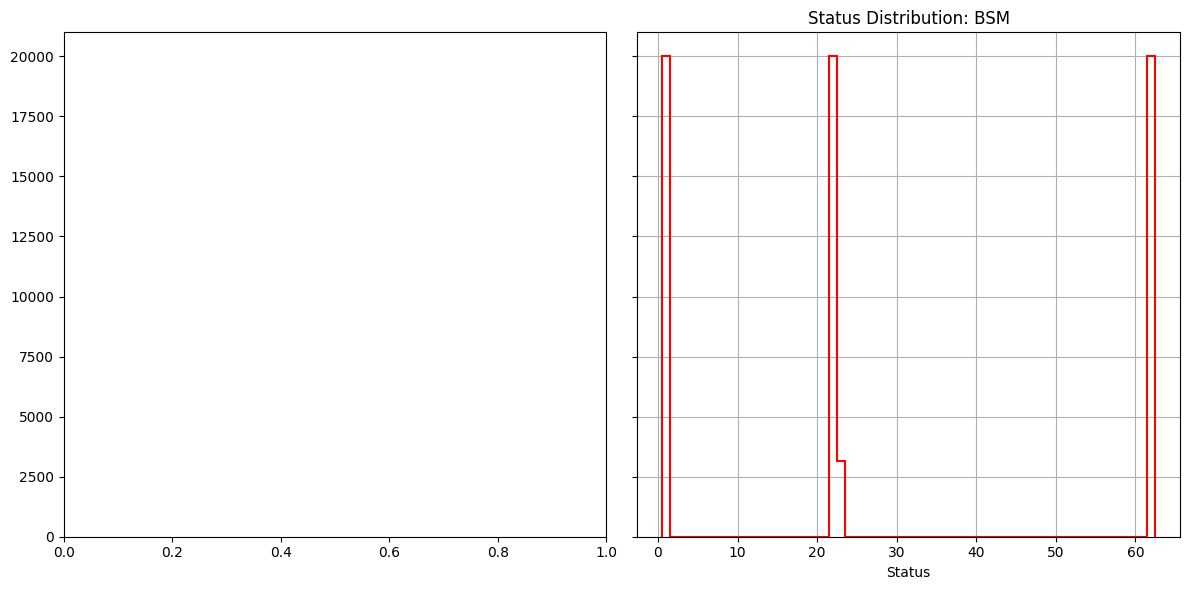

DataFrames summary:
Neutralino 1: (20000, 4)
Neutralino 2: (10000, 4)
Chargino pT:
  Count   : 10000
  Min     : 3.54
  Median  : 539.02
  Mean    : 592.50
  Std Dev : 341.46
  Max     : 2930.33

Chargino eta:
  Count   : 10000
  Min     : -6.99
  Median  : -0.02
  Mean    : -0.02
  Std Dev : 1.34
  Max     : 5.13

Chargino phi:
  Count   : 10000
  Min     : -3.14
  Median  : -0.02
  Mean    : -0.01
  Std Dev : 1.82
  Max     : 3.14

Neutralino 1 pT:
  Count   : 20000
  Min     : 4.69
  Median  : 527.84
  Mean    : 561.65
  Std Dev : 269.70
  Max     : 2293.14

Neutralino 1 eta:
  Count   : 20000
  Min     : -5.74
  Median  : -0.00
  Mean    : -0.00
  Std Dev : 1.04
  Max     : 4.83

Neutralino 1 phi:
  Count   : 20000
  Min     : -3.14
  Median  : 0.02
  Mean    : -0.01
  Std Dev : 1.81
  Max     : 3.14

Neutralino 2 pT:
  Count   : 10000
  Min     : 3.54
  Median  : 539.79
  Mean    : 593.14
  Std Dev : 341.77
  Max     : 2571.33

Neutralino 2 eta:
  Count   : 10000
  Min     : -6.94

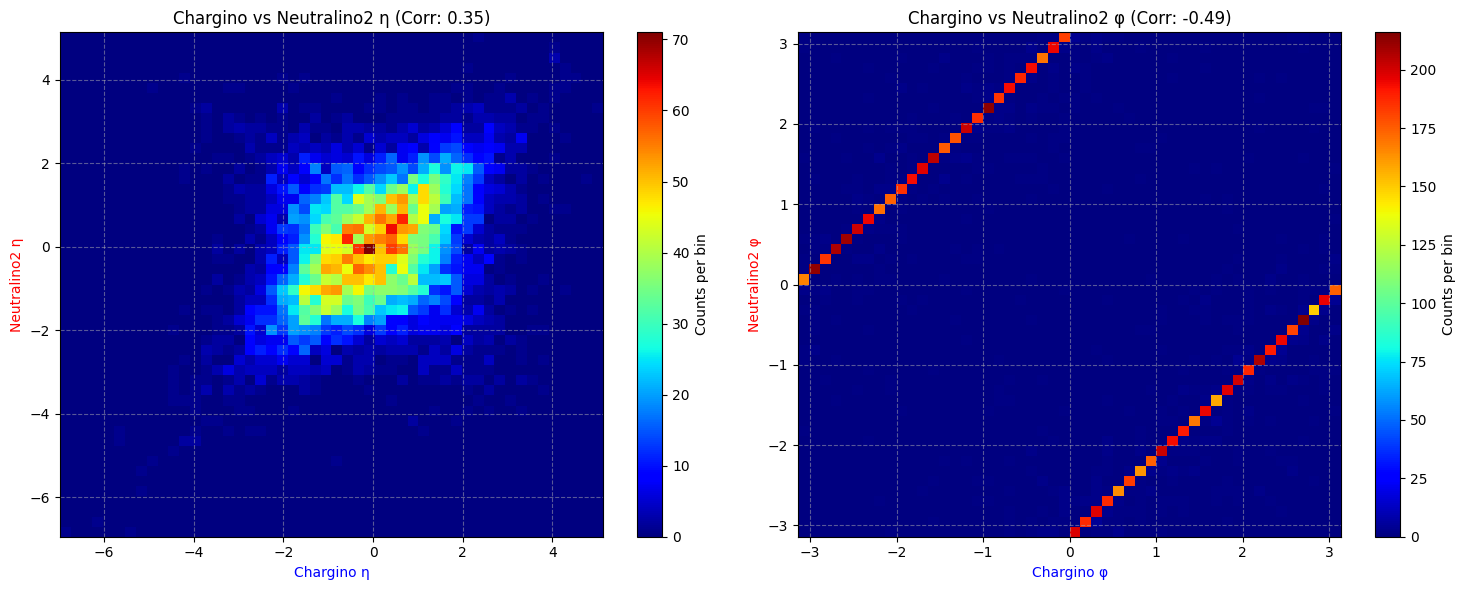

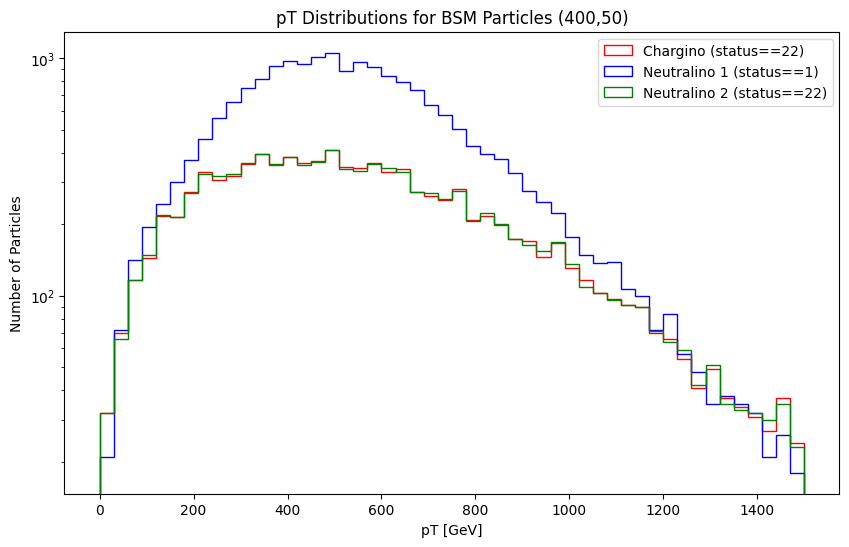

In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Open the ROOT file
file = uproot.open("/Users/ericballabene/user.caiy.Truth3.WB_v02.C1mN2_WZ_1200_0_1L7_MadSpin_EXT0/user.caiy.43348805.EXT0._000001.DAOD_TRUTH3.root")

# List all trees in the file
print("Trees in the file:")
print(file.keys())



# Specify the tree name
tree_name = "CollectionTree;1"

# Access the tree
tree = file[tree_name]

# List all branches in the tree
print("Branches in the tree:")
print(tree.keys())

# Check the total number of events
print(f"Total number of events in the tree: {tree.num_entries}")


import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt


#-------------------------------------------------------
# arrays we need for electrons, muons
#-------------------------------------------------------
branches_electrons = [
    "TruthElectronsAuxDyn.px",
    "TruthElectronsAuxDyn.py",
    "TruthElectronsAuxDyn.pz",
    "TruthElectronsAuxDyn.e",
    "TruthElectronsAuxDyn.status"
]
branches_muons = [
    "TruthMuonsAuxDyn.px",
    "TruthMuonsAuxDyn.py",
    "TruthMuonsAuxDyn.pz",
    "TruthMuonsAuxDyn.e",
    "TruthMuonsAuxDyn.status"
]

arr_electrons = tree.arrays(branches_electrons, library="ak")
arr_muons     = tree.arrays(branches_muons,     library="ak")

#-------------------------------------------------------
# Compute electron, muon pT in MeV
#-------------------------------------------------------
px_ele = arr_electrons["TruthElectronsAuxDyn.px"]
py_ele = arr_electrons["TruthElectronsAuxDyn.py"]
pt_ele = np.sqrt(px_ele**2 + py_ele**2)

px_mu = arr_muons["TruthMuonsAuxDyn.px"]
py_mu = arr_muons["TruthMuonsAuxDyn.py"]
pt_mu = np.sqrt(px_mu**2 + py_mu**2)

#-------------------------------------------------------
# Require final-state leptons (status==1) with pT > 7 GeV
#-------------------------------------------------------
is_final_ele  = (arr_electrons["TruthElectronsAuxDyn.status"] == 1)
pass_pt_ele   = (pt_ele > 7000)  # in MeV
keep_ele_mask = is_final_ele & pass_pt_ele
#keep_ele_mask = is_final_ele

is_final_mu   = (arr_muons["TruthMuonsAuxDyn.status"] == 1)
pass_pt_mu    = (pt_mu > 7000)   # in MeV
keep_mu_mask  = is_final_mu & pass_pt_mu
#keep_mu_mask  = is_final_mu


#-------------------------------------------------------
# Count leptons per event
#-------------------------------------------------------
n_elec = ak.sum(keep_ele_mask, axis=1)
n_muon = ak.sum(keep_mu_mask,  axis=1)
n_lept = n_elec + n_muon

#-------------------------------------------------------
# Count number of events with 0, 1, 2, 3, 4, and 5+ leptons
#-------------------------------------------------------
n_events = len(n_lept)
n_0lep   = ak.sum(n_lept == 0)
n_1lep   = ak.sum(n_lept == 1)
n_2lep   = ak.sum(n_lept == 2)
n_3lep   = ak.sum(n_lept == 3)
n_4lep   = ak.sum(n_lept == 4)
n_5plus  = ak.sum(n_lept >= 5)

#-------------------------------------------------------
# Print event statistics
#-------------------------------------------------------
print(f"Total events in DAOD:         {n_events}")
print(f"Events with >=2 leptons (pT > 7 GeV): {n_2lep + n_3lep + n_4lep + n_5plus}")
print(f"Fraction passing 2-lepton cut: {100.0 * (n_2lep + n_3lep + n_4lep + n_5plus) / n_events:.2f}%")

print("\nDetailed Breakdown:")
print(f"  Events with  0 leptons: {n_0lep}")
print(f"  Events with  1 lepton : {n_1lep}")
print(f"  Events with  2 leptons: {n_2lep}")
print(f"  Events with  3 leptons: {n_3lep}")
print(f"  Events with  4 leptons: {n_4lep}")
print(f"  Events with  5+ leptons: {n_5plus}")

#-------------------------------------------------------
# Plot histogram of number of leptons per event
#-------------------------------------------------------
n_lept_np = ak.to_numpy(n_lept)

# Define bins for integer counts (ensuring correct placement)
bin_edges = np.arange(-0.5, max(n_lept_np) + 1.5, 1)  

# Create histogram
plt.hist(n_lept_np, bins=bin_edges, histtype='step', color='black', linewidth=1.5)

# Set x-axis ticks to exact integer values
plt.xticks(np.arange(0, max(n_lept_np) + 1, 1))

# Force x-axis and y-axis to start from 0
plt.xlim(-0.5, max(n_lept_np) + 0.5)
plt.ylim(0, None)

# Labels
plt.xlabel("# final-state truth leptons (pT > 7 GeV)")
plt.ylabel("# Events")

# Show plot
plt.show()

import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------------------
# Open the ROOT file and access the tree.
#-------------------------------------------------------

#-------------------------------------------------------
# Retrieve the status branches for bosons and BSM particles.
#
# For bosons, we use the branch from TruthBosonAuxDyn.
# For BSM particles, we use the branch from TruthBSMAuxDyn.
#-------------------------------------------------------
#branches_bos = ["TruthBosonAuxDyn.status"]
branches_bsm = ["TruthBSMAuxDyn.status"]

# Read the branches into awkward arrays.
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

#-------------------------------------------------------
# Flatten the jagged arrays to get one-dimensional arrays.
#-------------------------------------------------------
#status_bos = ak.flatten(arr_bos["TruthBosonAuxDyn.status"])
status_bsm = ak.flatten(arr_bsm["TruthBSMAuxDyn.status"])

# Convert the flattened arrays to NumPy arrays.
#status_bos_np = ak.to_numpy(status_bos)
status_bsm_np = ak.to_numpy(status_bsm)

#-------------------------------------------------------
# Compute basic statistics for the status arrays.
#-------------------------------------------------------
def print_statistics(name, array):
    unique_vals, counts = np.unique(array, return_counts=True)
    print(f"=== {name} Status Statistics ===")
    print(f"Minimum status: {np.min(array)}")
    print(f"Maximum status: {np.max(array)}")
    print(f"Mean status:    {np.mean(array):.2f}")
    print(f"Median status:  {np.median(array)}")
    print("Unique status values and counts:")
    for val, count in zip(unique_vals, counts):
        print(f"  Status {val}: {count} entries")
    print("")

#print_statistics("Boson", status_bos_np)
print_statistics("BSM", status_bsm_np)

#-------------------------------------------------------
# Plot the status distributions.
#-------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#bins_bos = np.arange(np.min(status_bos_np) - 0.5, np.max(status_bos_np) + 1.5, 1)
#ax1.hist(status_bos_np, bins=bins_bos, histtype='step', color='blue', linewidth=1.5)
#ax1.set_title("Status Distribution: Bosons")
#ax1.set_xlabel("Status")
#ax1.set_ylabel("Number of entries")
#ax1.grid(True)

bins_bsm = np.arange(np.min(status_bsm_np) - 0.5, np.max(status_bsm_np) + 1.5, 1)
ax2.hist(status_bsm_np, bins=bins_bsm, histtype='step', color='red', linewidth=1.5)
ax2.set_title("Status Distribution: BSM")
ax2.set_xlabel("Status")
ax2.grid(True)

plt.tight_layout()
plt.show()

#The meaning of Status like f they are final state particels, particles from hardest subprocess, produced by beam0remnant is in MC twiki

# Below is for ONLY 1 point


#!/usr/bin/env python3
import uproot
import awkward as ak
import numpy as np
import pandas as pd

# Branch lists for bosons and BSM objects ---
#branches_bos = [
#    "TruthBosonAuxDyn.pdgId",
#    "TruthBosonAuxDyn.px",
#    "TruthBosonAuxDyn.py",
#    "TruthBosonAuxDyn.pz",   
#    "TruthBosonAuxDyn.status"
#]
branches_bsm = [
    "TruthBSMAuxDyn.pdgId",
    "TruthBSMAuxDyn.px",
    "TruthBSMAuxDyn.py",
    "TruthBSMAuxDyn.pz",     
    "TruthBSMAuxDyn.status"
]

# --- Read branches using uproot ---
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

###########################
# Process BSM Data
###########################
# Compute transverse momentum (pT) in GeV for BSM:
pt_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                 arr_bsm["TruthBSMAuxDyn.py"]**2) / 1000.0

# Compute total momentum p (in GeV) for BSM:
p_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                arr_bsm["TruthBSMAuxDyn.py"]**2 +
                arr_bsm["TruthBSMAuxDyn.pz"]**2) / 1000.0

# Convert pz to GeV for BSM:
pz_bsm = arr_bsm["TruthBSMAuxDyn.pz"] / 1000.0

# Compute pseudorapidity (eta) for BSM:
eta_bsm = 0.5 * np.log((p_bsm + pz_bsm) / (p_bsm - pz_bsm))

# Compute azimuthal angle (phi) for BSM:
phi_bsm = np.arctan2(arr_bsm["TruthBSMAuxDyn.py"], arr_bsm["TruthBSMAuxDyn.px"])

# Flatten and convert BSM arrays to NumPy:
pdg_bsm_np    = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.pdgId"]))
status_bsm_np = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.status"]))
pt_bsm_np     = ak.to_numpy(ak.flatten(pt_bsm))
eta_bsm_np    = ak.to_numpy(ak.flatten(eta_bsm))
phi_bsm_np    = ak.to_numpy(ak.flatten(phi_bsm))

# Define masks for each BSM particle type based on PDG ID and status:
mask_chargino    = (np.abs(pdg_bsm_np) == 1000024) & (status_bsm_np == 22)
mask_neutralino1 = (np.abs(pdg_bsm_np) == 1000022) & (status_bsm_np == 1)
mask_neutralino2 = (np.abs(pdg_bsm_np) == 1000023) & (status_bsm_np == 22)

bsm_chargino    = {
    "pdgId": pdg_bsm_np[mask_chargino],
    "pt": pt_bsm_np[mask_chargino],
    "eta": eta_bsm_np[mask_chargino],
    "phi": phi_bsm_np[mask_chargino]
}
bsm_neutralino1 = {
    "pdgId": pdg_bsm_np[mask_neutralino1],
    "pt": pt_bsm_np[mask_neutralino1],
    "eta": eta_bsm_np[mask_neutralino1],
    "phi": phi_bsm_np[mask_neutralino1]
}
bsm_neutralino2 = {
    "pdgId": pdg_bsm_np[mask_neutralino2],
    "pt": pt_bsm_np[mask_neutralino2],
    "eta": eta_bsm_np[mask_neutralino2],
    "phi": phi_bsm_np[mask_neutralino2]
}


df_bsm_chargino_400_50 = pd.DataFrame(bsm_chargino)
df_bsm_neutralino1_400_50 = pd.DataFrame(bsm_neutralino1)
df_bsm_neutralino2_400_50 = pd.DataFrame(bsm_neutralino2)

print("DataFrames summary:")
print("Neutralino 1:", df_bsm_neutralino1_400_50.shape)
print("Neutralino 2:", df_bsm_neutralino2_400_50.shape)


def print_detailed_stats(label, array):
    if len(array) > 0:
        count = len(array)
        mn = np.min(array)
        med = np.median(array)
        mean = np.mean(array)
        std = np.std(array)
        mx = np.max(array)
        print(f"{label}:")
        print(f"  Count   : {count}")
        print(f"  Min     : {mn:.2f}")
        print(f"  Median  : {med:.2f}")
        print(f"  Mean    : {mean:.2f}")
        print(f"  Std Dev : {std:.2f}")
        print(f"  Max     : {mx:.2f}\n")
    else:
        print(f"{label}: No entries found.\n")
# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")
# Extract eta and phi for Chargino and Neutralino2
eta_chargino = df_bsm_chargino_400_50["eta"].values[:n_pairs_BSM]
eta_neu2 = df_bsm_neutralino2_400_50["eta"].values[:n_pairs_BSM]
phi_chargino = df_bsm_chargino_400_50["phi"].values[:n_pairs_BSM]
phi_neu2 = df_bsm_neutralino2_400_50["phi"].values[:n_pairs_BSM]

corr_eta_BSM = np.corrcoef(eta_chargino, eta_neu2)[0, 1]
corr_phi_BSM = np.corrcoef(phi_chargino, phi_neu2)[0, 1]

print_detailed_stats("Chargino pT", df_bsm_chargino_400_50["pt"])
print_detailed_stats("Chargino eta", df_bsm_chargino_400_50["eta"])
print_detailed_stats("Chargino phi", df_bsm_chargino_400_50["phi"])

print_detailed_stats("Neutralino 1 pT", df_bsm_neutralino1_400_50["pt"])
print_detailed_stats("Neutralino 1 eta", df_bsm_neutralino1_400_50["eta"])
print_detailed_stats("Neutralino 1 phi", df_bsm_neutralino1_400_50["phi"])

print_detailed_stats("Neutralino 2 pT", df_bsm_neutralino2_400_50["pt"])
print_detailed_stats("Neutralino 2 eta", df_bsm_neutralino2_400_50["eta"])
print_detailed_stats("Neutralino 2 phi", df_bsm_neutralino2_400_50["phi"])

# --- Plot histograms for bosons and BSM particles ---

# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")


# --- Create subplots ---
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between plots

# Bottom Left: 2D Histogram for Chargino η vs Neutralino2 η
im2 = axs[0].hist2d(eta_chargino, eta_neu2, bins=50, cmap='jet', density=False)
cbar2 = fig.colorbar(im2[3], ax=axs[0])
cbar2.set_label("Counts per bin")
axs[0].set_xlabel("Chargino η", color='blue')
axs[0].set_ylabel("Neutralino2 η", color='red')
axs[0].set_title(f"Chargino vs Neutralino2 η (Corr: {corr_eta_BSM:.2f})")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Bottom Right: 2D Histogram for Chargino φ vs Neutralino2 φ
im3 = axs[1].hist2d(phi_chargino, phi_neu2, bins=50, cmap='jet', density=False)
cbar3 = fig.colorbar(im3[3], ax=axs[1])
cbar3.set_label("Counts per bin")
axs[1].set_xlabel("Chargino φ", color='blue')
axs[1].set_ylabel("Neutralino2 φ", color='red')
axs[1].set_title(f"Chargino vs Neutralino2 φ (Corr: {corr_phi_BSM:.2f})")
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
plt.hist(df_bsm_chargino_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='red', label="Chargino (status==22)")
plt.hist(df_bsm_neutralino1_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='blue', label="Neutralino 1 (status==1)")
plt.hist(df_bsm_neutralino2_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='green', label="Neutralino 2 (status==22)")
plt.xlabel('pT [GeV]')
plt.ylabel('Number of Particles')
plt.title('pT Distributions for BSM Particles (400,50)')
plt.yscale('log')
plt.legend()
plt.show()


Trees in the file:
['##Params;3', '##Params;2', '##Shapes;3', '##Shapes;2', '##Links;3', '##Links;2', 'MetaData;1', 'MetaDataHdr;1', 'MetaDataHdrForm;1', 'CollectionTree;1', 'POOLContainer;1', 'POOLContainerForm;1', 'POOLCollectionTree;1']
Branches in the tree:
['xTrigDecisionAux.', 'METAssoc_AntiKt4EMPFlowAux.', 'METAssoc_AntiKt4EMTopoAux.', 'EventInfoAux.', 'Kt4EMPFlowEventShapeAux.', 'Kt4EMPFlowNeutEventShapeAux.', 'Kt4EMPFlowPUSBEventShapeAux.', 'Kt4EMTopoOriginEventShapeAux.', 'TopoClusterIsoCentralEventShapeAux.', 'TopoClusterIsoForwardEventShapeAux.', 'BTagging_AntiKt4EMPFlowAux.', 'BTagging_AntiKtVR30Rmax4Rmin02TrackAux.', 'BornLeptonsAux.', 'CombinedMuonTrackParticlesAux.', 'DiTauJetsAux.', 'DiTauJetsLowPtAux.', 'ElectronsAux.', 'ExtrapolatedMuonTrackParticlesAux.', 'FourLeptonVerticesAux.', 'GSFConversionVerticesAux.', 'GSFTrackParticlesAux.', 'HLT_xAOD__TrigMissingETContainer_TrigEFMissingETAux.', 'HLT_xAOD__TrigMissingETContainer_TrigEFMissingET_mhtAux.', 'HardScatterPartic

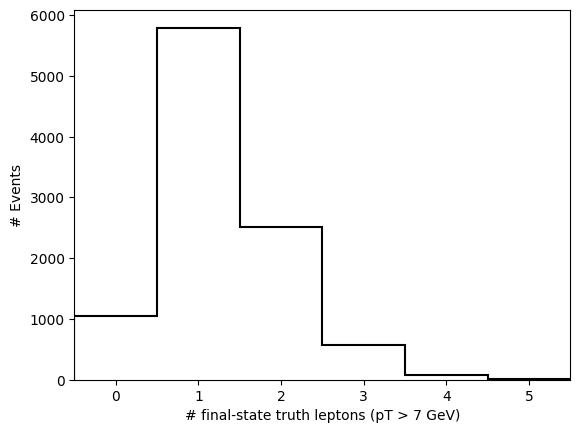

=== BSM Status Statistics ===
Minimum status: 1
Maximum status: 62
Mean status:    28.10
Median status:  22.0
Unique status values and counts:
  Status 1: 20000 entries
  Status 22: 20000 entries
  Status 23: 2736 entries
  Status 44: 5 entries
  Status 62: 20000 entries



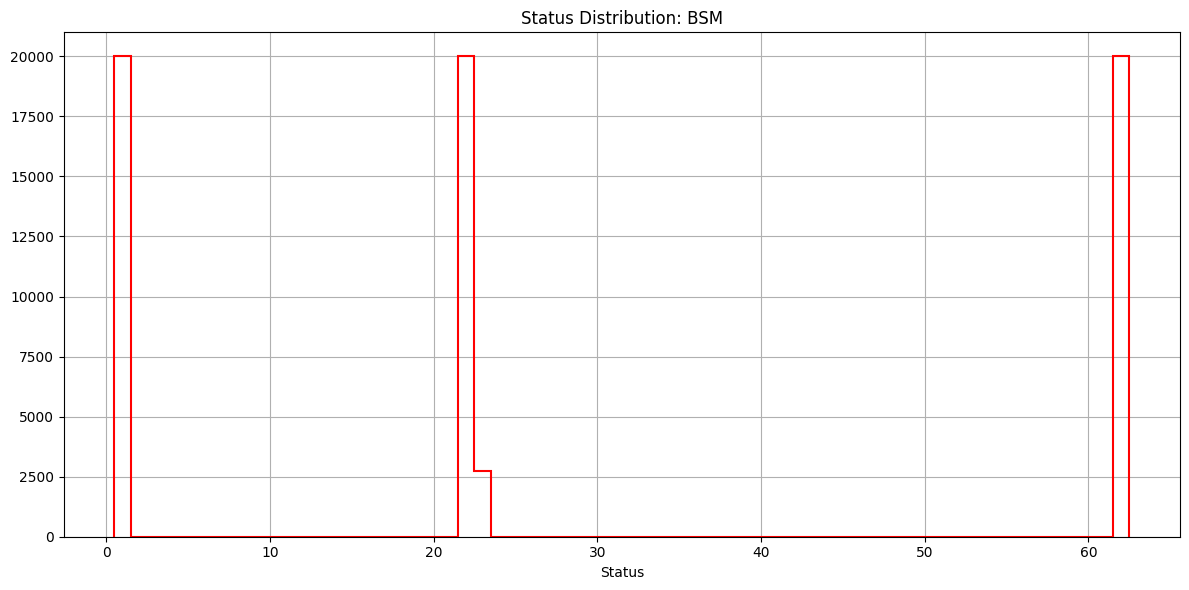

DataFrames summary:
Neutralino 1: (20000, 4)
Neutralino 2: (10000, 4)
Chargino pT:
  Count   : 10000
  Min     : 5.34
  Median  : 406.33
  Mean    : 456.62
  Std Dev : 274.03
  Max     : 2034.92

Chargino eta:
  Count   : 10000
  Min     : -6.33
  Median  : 0.04
  Mean    : 0.02
  Std Dev : 1.49
  Max     : 6.43

Chargino phi:
  Count   : 10000
  Min     : -3.14
  Median  : -0.03
  Mean    : -0.03
  Std Dev : 1.82
  Max     : 3.14

Neutralino 1 pT:
  Count   : 20000
  Min     : 5.28
  Median  : 356.88
  Mean    : 389.18
  Std Dev : 200.45
  Max     : 1789.17

Neutralino 1 eta:
  Count   : 20000
  Min     : -5.29
  Median  : 0.00
  Mean    : 0.00
  Std Dev : 1.13
  Max     : 5.31

Neutralino 1 phi:
  Count   : 20000
  Min     : -3.14
  Median  : -0.06
  Mean    : -0.04
  Std Dev : 1.81
  Max     : 3.14

Neutralino 2 pT:
  Count   : 10000
  Min     : 5.34
  Median  : 406.85
  Mean    : 457.87
  Std Dev : 274.60
  Max     : 2034.92

Neutralino 2 eta:
  Count   : 10000
  Min     : -5.60
  

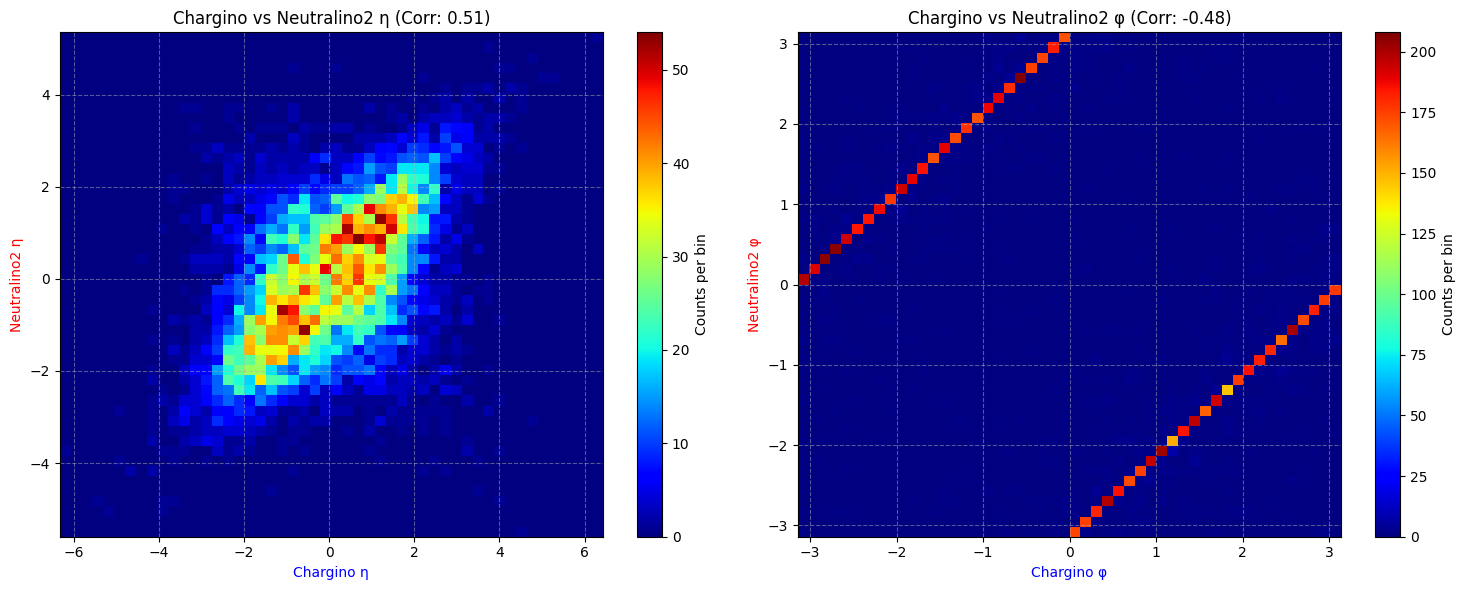

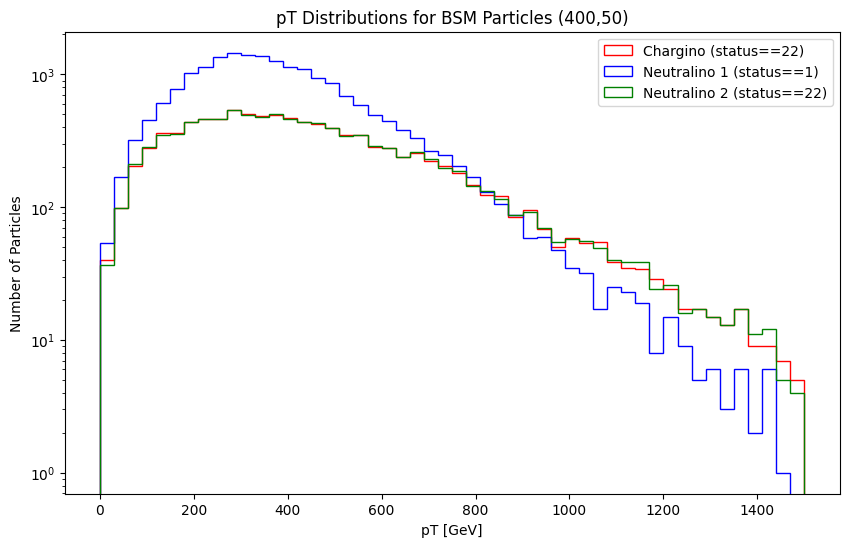

In [4]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import awkward as ak


# Open the ROOT file
file = uproot.open("/Users/ericballabene/mc20_13TeV.545833.MGPy8EG_C1pN2_Wh_800_0_1L20orXe_MadSpin.deriv.DAOD_PHYS.e8566_e8455_s3797_r13167_r13146_p6266/DAOD_PHYS.41665391._000001.pool.root.1")

# Specify the tree name
tree_name = "CollectionTree;1"

# Access the tree
tree = file[tree_name]

# List all trees in the file
print("Trees in the file:")
print(file.keys())

# List all branches in the tree
print("Branches in the tree:")
print(tree.keys())

# Check the total number of events
print(f"Total number of events in the tree: {tree.num_entries}")


#-------------------------------------------------------
# arrays we need for electrons, muons
#-------------------------------------------------------
branches_electrons = [
    "TruthElectronsAuxDyn.px",
    "TruthElectronsAuxDyn.py",
    "TruthElectronsAuxDyn.pz",
    "TruthElectronsAuxDyn.e",
    "TruthElectronsAuxDyn.status"
]
branches_muons = [
    "TruthMuonsAuxDyn.px",
    "TruthMuonsAuxDyn.py",
    "TruthMuonsAuxDyn.pz",
    "TruthMuonsAuxDyn.e",
    "TruthMuonsAuxDyn.status"
]

arr_electrons = tree.arrays(branches_electrons, library="ak")
arr_muons     = tree.arrays(branches_muons,     library="ak")

#-------------------------------------------------------
# Compute electron, muon pT in MeV
#-------------------------------------------------------
px_ele = arr_electrons["TruthElectronsAuxDyn.px"]
py_ele = arr_electrons["TruthElectronsAuxDyn.py"]
pt_ele = np.sqrt(px_ele**2 + py_ele**2)

px_mu = arr_muons["TruthMuonsAuxDyn.px"]
py_mu = arr_muons["TruthMuonsAuxDyn.py"]
pt_mu = np.sqrt(px_mu**2 + py_mu**2)

#-------------------------------------------------------
# Require final-state leptons (status==1) with pT > 7 GeV
#-------------------------------------------------------
is_final_ele  = (arr_electrons["TruthElectronsAuxDyn.status"] == 1)
pass_pt_ele   = (pt_ele > 7000)  # in MeV
keep_ele_mask = is_final_ele & pass_pt_ele
#keep_ele_mask = is_final_ele

is_final_mu   = (arr_muons["TruthMuonsAuxDyn.status"] == 1)
pass_pt_mu    = (pt_mu > 7000)   # in MeV
keep_mu_mask  = is_final_mu & pass_pt_mu
#keep_mu_mask  = is_final_mu


#-------------------------------------------------------
# Count leptons per event
#-------------------------------------------------------
n_elec = ak.sum(keep_ele_mask, axis=1)
n_muon = ak.sum(keep_mu_mask,  axis=1)
n_lept = n_elec + n_muon

#-------------------------------------------------------
# Count number of events with 0, 1, 2, 3, 4, and 5+ leptons
#-------------------------------------------------------
n_events = len(n_lept)
n_0lep   = ak.sum(n_lept == 0)
n_1lep   = ak.sum(n_lept == 1)
n_2lep   = ak.sum(n_lept == 2)
n_3lep   = ak.sum(n_lept == 3)
n_4lep   = ak.sum(n_lept == 4)
n_5plus  = ak.sum(n_lept >= 5)

#-------------------------------------------------------
# Print event statistics
#-------------------------------------------------------
print(f"Total events in DAOD:         {n_events}")
print(f"Events with >=2 leptons (pT > 7 GeV): {n_2lep + n_3lep + n_4lep + n_5plus}")
print(f"Fraction passing 2-lepton cut: {100.0 * (n_2lep + n_3lep + n_4lep + n_5plus) / n_events:.2f}%")

print("\nDetailed Breakdown:")
print(f"  Events with  0 leptons: {n_0lep}")
print(f"  Events with  1 lepton : {n_1lep}")
print(f"  Events with  2 leptons: {n_2lep}")
print(f"  Events with  3 leptons: {n_3lep}")
print(f"  Events with  4 leptons: {n_4lep}")
print(f"  Events with  5+ leptons: {n_5plus}")

#-------------------------------------------------------
# Plot histogram of number of leptons per event
#-------------------------------------------------------
n_lept_np = ak.to_numpy(n_lept)

# Define bins for integer counts (ensuring correct placement)
bin_edges = np.arange(-0.5, max(n_lept_np) + 1.5, 1)  

# Create histogram
plt.hist(n_lept_np, bins=bin_edges, histtype='step', color='black', linewidth=1.5)

# Set x-axis ticks to exact integer values
plt.xticks(np.arange(0, max(n_lept_np) + 1, 1))

# Force x-axis and y-axis to start from 0
plt.xlim(-0.5, max(n_lept_np) + 0.5)
plt.ylim(0, None)

# Labels
plt.xlabel("# final-state truth leptons (pT > 7 GeV)")
plt.ylabel("# Events")

# Show plot
plt.show()






#-------------------------------------------------------
# Retrieve the status branches for bosons and BSM particles.
#
# For bosons, we use the branch from TruthBosonAuxDyn.
# For BSM particles, we use the branch from TruthBSMAuxDyn.
#-------------------------------------------------------
#branches_bos = ["TruthBosonAuxDyn.status"]
branches_bsm = ["TruthBSMAuxDyn.status"]

# Read the branches into awkward arrays.
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

#-------------------------------------------------------
# Flatten the jagged arrays to get one-dimensional arrays.
#-------------------------------------------------------
#status_bos = ak.flatten(arr_bos["TruthBosonAuxDyn.status"])
status_bsm = ak.flatten(arr_bsm["TruthBSMAuxDyn.status"])

# Convert the flattened arrays to NumPy arrays.
#status_bos_np = ak.to_numpy(status_bos)
status_bsm_np = ak.to_numpy(status_bsm)

#-------------------------------------------------------
# Compute basic statistics for the status arrays.
#-------------------------------------------------------
def print_statistics(name, array):
    unique_vals, counts = np.unique(array, return_counts=True)
    print(f"=== {name} Status Statistics ===")
    print(f"Minimum status: {np.min(array)}")
    print(f"Maximum status: {np.max(array)}")
    print(f"Mean status:    {np.mean(array):.2f}")
    print(f"Median status:  {np.median(array)}")
    print("Unique status values and counts:")
    for val, count in zip(unique_vals, counts):
        print(f"  Status {val}: {count} entries")
    print("")

#print_statistics("Boson", status_bos_np)
print_statistics("BSM", status_bsm_np)

#-------------------------------------------------------
# Plot the status distributions.
#-------------------------------------------------------
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6), sharey=True)

bins_bsm = np.arange(np.min(status_bsm_np) - 0.5, np.max(status_bsm_np) + 1.5, 1)
ax1.hist(status_bsm_np, bins=bins_bsm, histtype='step', color='red', linewidth=1.5)
ax1.set_title("Status Distribution: BSM")
ax1.set_xlabel("Status")
ax1.grid(True)

plt.tight_layout()
plt.show()



branches_bsm = [
    "TruthBSMAuxDyn.pdgId",
    "TruthBSMAuxDyn.px",
    "TruthBSMAuxDyn.py",
    "TruthBSMAuxDyn.pz",     
    "TruthBSMAuxDyn.status"
]

# --- Read branches using uproot ---
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

###########################
# Process BSM Data
###########################
# Compute transverse momentum (pT) in GeV for BSM:
pt_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                 arr_bsm["TruthBSMAuxDyn.py"]**2) / 1000.0

# Compute total momentum p (in GeV) for BSM:
p_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                arr_bsm["TruthBSMAuxDyn.py"]**2 +
                arr_bsm["TruthBSMAuxDyn.pz"]**2) / 1000.0

# Convert pz to GeV for BSM:
pz_bsm = arr_bsm["TruthBSMAuxDyn.pz"] / 1000.0

# Compute pseudorapidity (eta) for BSM:
eta_bsm = 0.5 * np.log((p_bsm + pz_bsm) / (p_bsm - pz_bsm))

# Compute azimuthal angle (phi) for BSM:
phi_bsm = np.arctan2(arr_bsm["TruthBSMAuxDyn.py"], arr_bsm["TruthBSMAuxDyn.px"])

# Flatten and convert BSM arrays to NumPy:
pdg_bsm_np    = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.pdgId"]))
status_bsm_np = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.status"]))
pt_bsm_np     = ak.to_numpy(ak.flatten(pt_bsm))
eta_bsm_np    = ak.to_numpy(ak.flatten(eta_bsm))
phi_bsm_np    = ak.to_numpy(ak.flatten(phi_bsm))

# Define masks for each BSM particle type based on PDG ID and status:
mask_chargino    = (np.abs(pdg_bsm_np) == 1000024) & (status_bsm_np == 22)
mask_neutralino1 = (np.abs(pdg_bsm_np) == 1000022) & (status_bsm_np == 1)
mask_neutralino2 = (np.abs(pdg_bsm_np) == 1000023) & (status_bsm_np == 22)

bsm_chargino    = {
    "pdgId": pdg_bsm_np[mask_chargino],
    "pt": pt_bsm_np[mask_chargino],
    "eta": eta_bsm_np[mask_chargino],
    "phi": phi_bsm_np[mask_chargino]
}
bsm_neutralino1 = {
    "pdgId": pdg_bsm_np[mask_neutralino1],
    "pt": pt_bsm_np[mask_neutralino1],
    "eta": eta_bsm_np[mask_neutralino1],
    "phi": phi_bsm_np[mask_neutralino1]
}
bsm_neutralino2 = {
    "pdgId": pdg_bsm_np[mask_neutralino2],
    "pt": pt_bsm_np[mask_neutralino2],
    "eta": eta_bsm_np[mask_neutralino2],
    "phi": phi_bsm_np[mask_neutralino2]
}


df_bsm_chargino_400_50 = pd.DataFrame(bsm_chargino)
df_bsm_neutralino1_400_50 = pd.DataFrame(bsm_neutralino1)
df_bsm_neutralino2_400_50 = pd.DataFrame(bsm_neutralino2)

print("DataFrames summary:")
print("Neutralino 1:", df_bsm_neutralino1_400_50.shape)
print("Neutralino 2:", df_bsm_neutralino2_400_50.shape)


def print_detailed_stats(label, array):
    if len(array) > 0:
        count = len(array)
        mn = np.min(array)
        med = np.median(array)
        mean = np.mean(array)
        std = np.std(array)
        mx = np.max(array)
        print(f"{label}:")
        print(f"  Count   : {count}")
        print(f"  Min     : {mn:.2f}")
        print(f"  Median  : {med:.2f}")
        print(f"  Mean    : {mean:.2f}")
        print(f"  Std Dev : {std:.2f}")
        print(f"  Max     : {mx:.2f}\n")
    else:
        print(f"{label}: No entries found.\n")
# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")
# Extract eta and phi for Chargino and Neutralino2
eta_chargino = df_bsm_chargino_400_50["eta"].values[:n_pairs_BSM]
eta_neu2 = df_bsm_neutralino2_400_50["eta"].values[:n_pairs_BSM]
phi_chargino = df_bsm_chargino_400_50["phi"].values[:n_pairs_BSM]
phi_neu2 = df_bsm_neutralino2_400_50["phi"].values[:n_pairs_BSM]

corr_eta_BSM = np.corrcoef(eta_chargino, eta_neu2)[0, 1]
corr_phi_BSM = np.corrcoef(phi_chargino, phi_neu2)[0, 1]

print_detailed_stats("Chargino pT", df_bsm_chargino_400_50["pt"])
print_detailed_stats("Chargino eta", df_bsm_chargino_400_50["eta"])
print_detailed_stats("Chargino phi", df_bsm_chargino_400_50["phi"])

print_detailed_stats("Neutralino 1 pT", df_bsm_neutralino1_400_50["pt"])
print_detailed_stats("Neutralino 1 eta", df_bsm_neutralino1_400_50["eta"])
print_detailed_stats("Neutralino 1 phi", df_bsm_neutralino1_400_50["phi"])

print_detailed_stats("Neutralino 2 pT", df_bsm_neutralino2_400_50["pt"])
print_detailed_stats("Neutralino 2 eta", df_bsm_neutralino2_400_50["eta"])
print_detailed_stats("Neutralino 2 phi", df_bsm_neutralino2_400_50["phi"])

# --- Plot histograms for bosons and BSM particles ---

# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")


# --- Create subplots ---
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between plots

# Bottom Left: 2D Histogram for Chargino η vs Neutralino2 η
im2 = axs[0].hist2d(eta_chargino, eta_neu2, bins=50, cmap='jet', density=False)
cbar2 = fig.colorbar(im2[3], ax=axs[0])
cbar2.set_label("Counts per bin")
axs[0].set_xlabel("Chargino η", color='blue')
axs[0].set_ylabel("Neutralino2 η", color='red')
axs[0].set_title(f"Chargino vs Neutralino2 η (Corr: {corr_eta_BSM:.2f})")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Bottom Right: 2D Histogram for Chargino φ vs Neutralino2 φ
im3 = axs[1].hist2d(phi_chargino, phi_neu2, bins=50, cmap='jet', density=False)
cbar3 = fig.colorbar(im3[3], ax=axs[1])
cbar3.set_label("Counts per bin")
axs[1].set_xlabel("Chargino φ", color='blue')
axs[1].set_ylabel("Neutralino2 φ", color='red')
axs[1].set_title(f"Chargino vs Neutralino2 φ (Corr: {corr_phi_BSM:.2f})")
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
plt.hist(df_bsm_chargino_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='red', label="Chargino (status==22)")
plt.hist(df_bsm_neutralino1_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='blue', label="Neutralino 1 (status==1)")
plt.hist(df_bsm_neutralino2_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='green', label="Neutralino 2 (status==22)")
plt.xlabel('pT [GeV]')
plt.ylabel('Number of Particles')
plt.title('pT Distributions for BSM Particles (400,50)')
plt.yscale('log')
plt.legend()
plt.show()

Trees in the file:
['##Params;2', '##Params;1', '##Shapes;2', '##Shapes;1', '##Links;2', '##Links;1', 'CollectionTree;1', 'POOLContainer;1', 'POOLContainerForm;1', 'POOLCollectionTree;1', 'MetaData;1', 'MetaDataHdr;1', 'MetaDataHdrForm;1']
Branches in the tree:
['xTrigDecisionAux.', 'METAssoc_AntiKt4EMPFlowAux.', 'EventInfoAux.', 'Kt4EMPFlowEventShapeAux.', 'Kt4EMPFlowNeutEventShapeAux.', 'Kt4EMPFlowPUSBEventShapeAux.', 'Kt4EMTopoOriginEventShapeAux.', 'TopoClusterIsoCentralEventShapeAux.', 'TopoClusterIsoForwardEventShapeAux.', 'BTagging_AntiKt4EMPFlowAux.', 'CombinedMuonTrackParticlesAux.', 'ElectronsAux.', 'ExtrapolatedMuonTrackParticlesAux.', 'GSFConversionVerticesAux.', 'GSFTrackParticlesAux.', 'InDetForwardTrackParticlesAux.', 'InDetTrackParticlesAux.', 'MET_Core_AntiKt4EMPFlowAux.', 'MET_TruthAux.', 'MuonSegmentsAux.', 'MuonSpectrometerTrackParticlesAux.', 'MuonsAux.', 'PhotonsAux.', 'PrimaryVerticesAux.', 'TrigMatch_HLT_2e12_lhloose_L12EM10VHAux.', 'TrigMatch_HLT_2e12_lhloose_m

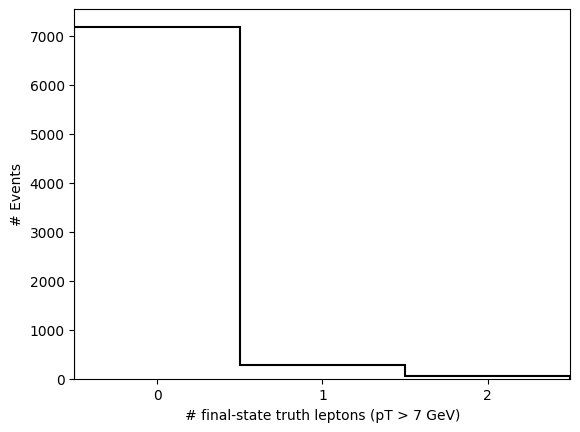

=== BSM Status Statistics ===
Minimum status: 1
Maximum status: 62
Mean status:    28.33
Median status:  22.0
Unique status values and counts:
  Status 1: 15056 entries
  Status 22: 15056 entries
  Status 44: 1 entries
  Status 62: 15056 entries



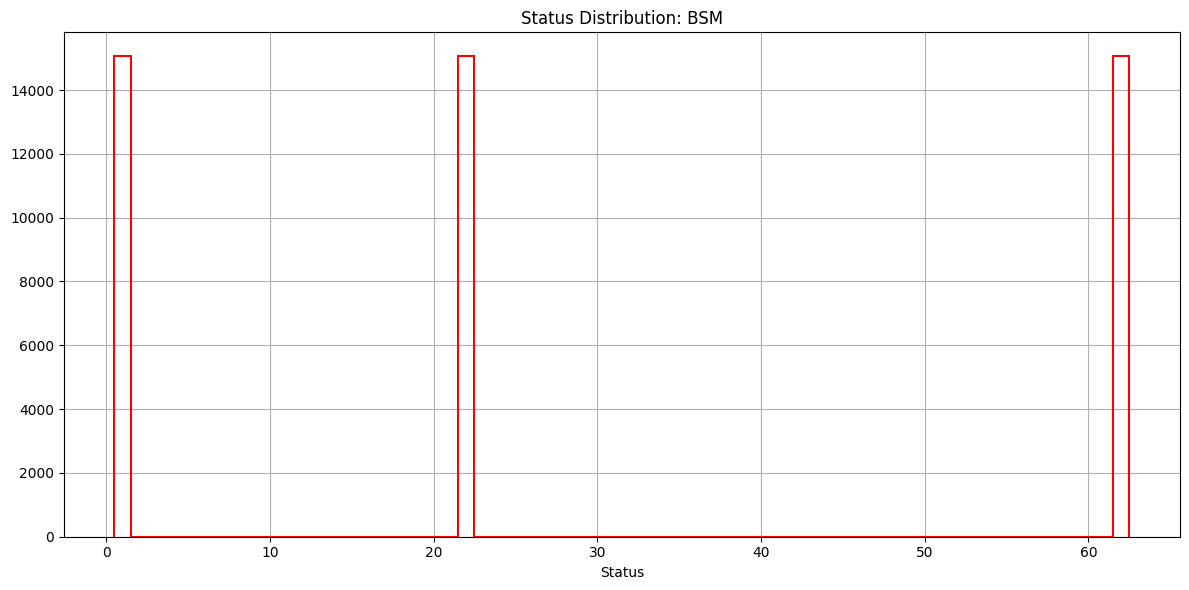

DataFrames summary:
Neutralino 1: (15056, 4)
Neutralino 2: (7528, 4)
Chargino pT:
  Count   : 7528
  Min     : 2.44
  Median  : 218.93
  Mean    : 252.73
  Std Dev : 164.03
  Max     : 1820.24

Chargino eta:
  Count   : 7528
  Min     : -6.35
  Median  : 0.02
  Mean    : 0.01
  Std Dev : 1.54
  Max     : 5.64

Chargino phi:
  Count   : 7528
  Min     : -3.14
  Median  : 0.04
  Mean    : 0.03
  Std Dev : 1.82
  Max     : 3.14

Neutralino 1 pT:
  Count   : 15056
  Min     : 2.18
  Median  : 217.42
  Mean    : 249.95
  Std Dev : 160.49
  Max     : 1810.80

Neutralino 1 eta:
  Count   : 15056
  Min     : -5.80
  Median  : 0.02
  Mean    : 0.01
  Std Dev : 1.54
  Max     : 6.19

Neutralino 1 phi:
  Count   : 15056
  Min     : -3.14
  Median  : 0.03
  Mean    : 0.03
  Std Dev : 1.81
  Max     : 3.14

Neutralino 2 pT:
  Count   : 7528
  Min     : 1.96
  Median  : 216.99
  Mean    : 248.59
  Std Dev : 158.36
  Max     : 1478.39

Neutralino 2 eta:
  Count   : 7528
  Min     : -5.55
  Median  : 

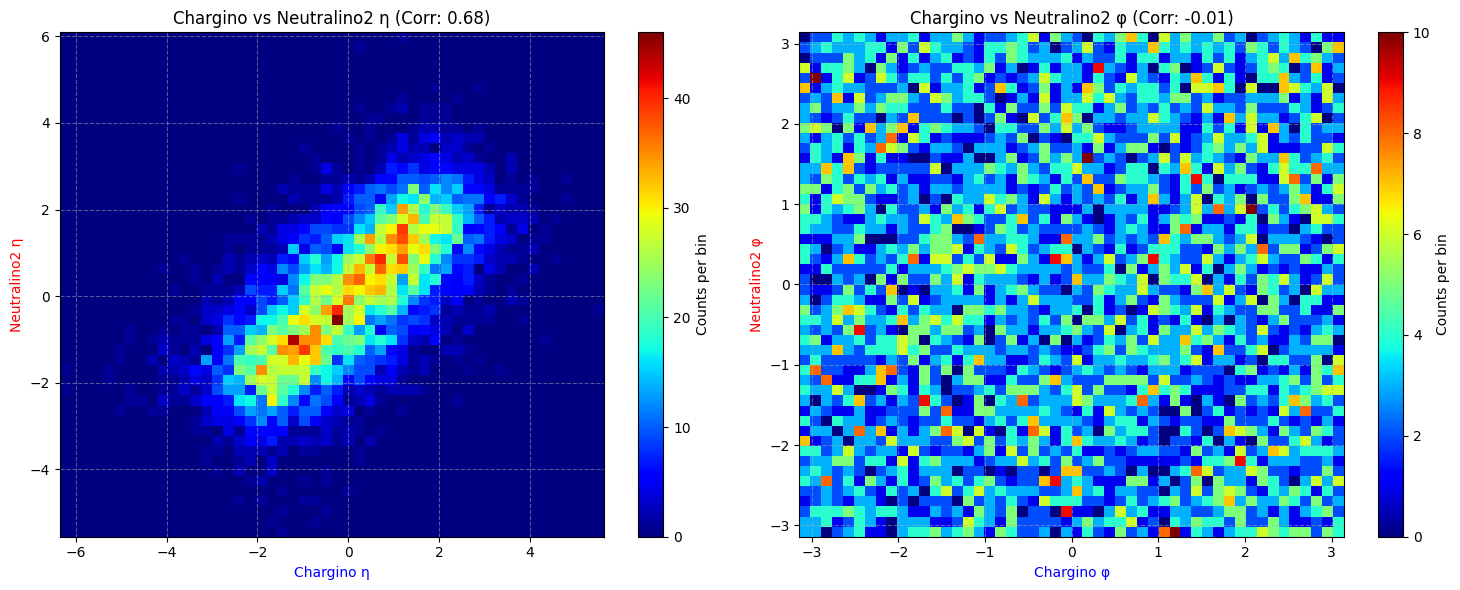

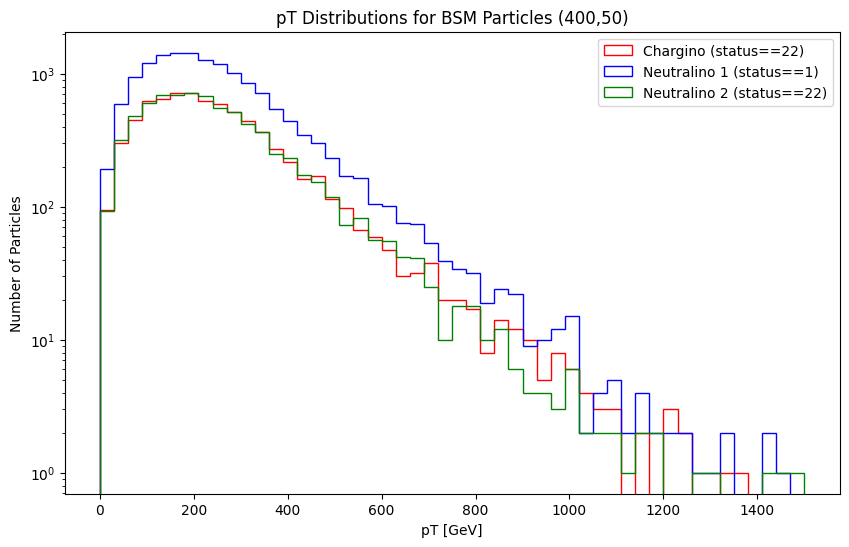

In [5]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import awkward as ak


# Open the ROOT file
file = uproot.open("/Users/ericballabene/DAOD_SUSY20.40735010._000001.pool.root.1")
# mc20_13TeV.545491.MGPy8EG_A14N23LO_N2C1p_201p5_200p75_200_MET200.deriv.DAOD_SUSY20.e8532_a907_r14859_p6355


# Specify the tree name
tree_name = "CollectionTree;1"

# Access the tree
tree = file[tree_name]

# List all trees in the file
print("Trees in the file:")
print(file.keys())

# List all branches in the tree
print("Branches in the tree:")
print(tree.keys())

# Check the total number of events
print(f"Total number of events in the tree: {tree.num_entries}")


#-------------------------------------------------------
# arrays we need for electrons, muons
#-------------------------------------------------------
branches_electrons = [
    "TruthElectronsAuxDyn.px",
    "TruthElectronsAuxDyn.py",
    "TruthElectronsAuxDyn.pz",
    "TruthElectronsAuxDyn.e",
    "TruthElectronsAuxDyn.status"
]
branches_muons = [
    "TruthMuonsAuxDyn.px",
    "TruthMuonsAuxDyn.py",
    "TruthMuonsAuxDyn.pz",
    "TruthMuonsAuxDyn.e",
    "TruthMuonsAuxDyn.status"
]

arr_electrons = tree.arrays(branches_electrons, library="ak")
arr_muons     = tree.arrays(branches_muons,     library="ak")

#-------------------------------------------------------
# Compute electron, muon pT in MeV
#-------------------------------------------------------
px_ele = arr_electrons["TruthElectronsAuxDyn.px"]
py_ele = arr_electrons["TruthElectronsAuxDyn.py"]
pt_ele = np.sqrt(px_ele**2 + py_ele**2)

px_mu = arr_muons["TruthMuonsAuxDyn.px"]
py_mu = arr_muons["TruthMuonsAuxDyn.py"]
pt_mu = np.sqrt(px_mu**2 + py_mu**2)

#-------------------------------------------------------
# Require final-state leptons (status==1) with pT > 7 GeV
#-------------------------------------------------------
is_final_ele  = (arr_electrons["TruthElectronsAuxDyn.status"] == 1)
pass_pt_ele   = (pt_ele > 7000)  # in MeV
keep_ele_mask = is_final_ele & pass_pt_ele
#keep_ele_mask = is_final_ele

is_final_mu   = (arr_muons["TruthMuonsAuxDyn.status"] == 1)
pass_pt_mu    = (pt_mu > 7000)   # in MeV
keep_mu_mask  = is_final_mu & pass_pt_mu
#keep_mu_mask  = is_final_mu


#-------------------------------------------------------
# Count leptons per event
#-------------------------------------------------------
n_elec = ak.sum(keep_ele_mask, axis=1)
n_muon = ak.sum(keep_mu_mask,  axis=1)
n_lept = n_elec + n_muon

#-------------------------------------------------------
# Count number of events with 0, 1, 2, 3, 4, and 5+ leptons
#-------------------------------------------------------
n_events = len(n_lept)
n_0lep   = ak.sum(n_lept == 0)
n_1lep   = ak.sum(n_lept == 1)
n_2lep   = ak.sum(n_lept == 2)
n_3lep   = ak.sum(n_lept == 3)
n_4lep   = ak.sum(n_lept == 4)
n_5plus  = ak.sum(n_lept >= 5)

#-------------------------------------------------------
# Print event statistics
#-------------------------------------------------------
print(f"Total events in DAOD:         {n_events}")
print(f"Events with >=2 leptons (pT > 7 GeV): {n_2lep + n_3lep + n_4lep + n_5plus}")
print(f"Fraction passing 2-lepton cut: {100.0 * (n_2lep + n_3lep + n_4lep + n_5plus) / n_events:.2f}%")

print("\nDetailed Breakdown:")
print(f"  Events with  0 leptons: {n_0lep}")
print(f"  Events with  1 lepton : {n_1lep}")
print(f"  Events with  2 leptons: {n_2lep}")
print(f"  Events with  3 leptons: {n_3lep}")
print(f"  Events with  4 leptons: {n_4lep}")
print(f"  Events with  5+ leptons: {n_5plus}")

#-------------------------------------------------------
# Plot histogram of number of leptons per event
#-------------------------------------------------------
n_lept_np = ak.to_numpy(n_lept)

# Define bins for integer counts (ensuring correct placement)
bin_edges = np.arange(-0.5, max(n_lept_np) + 1.5, 1)  

# Create histogram
plt.hist(n_lept_np, bins=bin_edges, histtype='step', color='black', linewidth=1.5)

# Set x-axis ticks to exact integer values
plt.xticks(np.arange(0, max(n_lept_np) + 1, 1))

# Force x-axis and y-axis to start from 0
plt.xlim(-0.5, max(n_lept_np) + 0.5)
plt.ylim(0, None)

# Labels
plt.xlabel("# final-state truth leptons (pT > 7 GeV)")
plt.ylabel("# Events")

# Show plot
plt.show()






#-------------------------------------------------------
# Retrieve the status branches for bosons and BSM particles.
#
# For bosons, we use the branch from TruthBosonAuxDyn.
# For BSM particles, we use the branch from TruthBSMAuxDyn.
#-------------------------------------------------------
#branches_bos = ["TruthBosonAuxDyn.status"]
branches_bsm = ["TruthBSMAuxDyn.status"]

# Read the branches into awkward arrays.
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

#-------------------------------------------------------
# Flatten the jagged arrays to get one-dimensional arrays.
#-------------------------------------------------------
#status_bos = ak.flatten(arr_bos["TruthBosonAuxDyn.status"])
status_bsm = ak.flatten(arr_bsm["TruthBSMAuxDyn.status"])

# Convert the flattened arrays to NumPy arrays.
#status_bos_np = ak.to_numpy(status_bos)
status_bsm_np = ak.to_numpy(status_bsm)

#-------------------------------------------------------
# Compute basic statistics for the status arrays.
#-------------------------------------------------------
def print_statistics(name, array):
    unique_vals, counts = np.unique(array, return_counts=True)
    print(f"=== {name} Status Statistics ===")
    print(f"Minimum status: {np.min(array)}")
    print(f"Maximum status: {np.max(array)}")
    print(f"Mean status:    {np.mean(array):.2f}")
    print(f"Median status:  {np.median(array)}")
    print("Unique status values and counts:")
    for val, count in zip(unique_vals, counts):
        print(f"  Status {val}: {count} entries")
    print("")

#print_statistics("Boson", status_bos_np)
print_statistics("BSM", status_bsm_np)

#-------------------------------------------------------
# Plot the status distributions.
#-------------------------------------------------------
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6), sharey=True)

bins_bsm = np.arange(np.min(status_bsm_np) - 0.5, np.max(status_bsm_np) + 1.5, 1)
ax1.hist(status_bsm_np, bins=bins_bsm, histtype='step', color='red', linewidth=1.5)
ax1.set_title("Status Distribution: BSM")
ax1.set_xlabel("Status")
ax1.grid(True)

plt.tight_layout()
plt.show()



branches_bsm = [
    "TruthBSMAuxDyn.pdgId",
    "TruthBSMAuxDyn.px",
    "TruthBSMAuxDyn.py",
    "TruthBSMAuxDyn.pz",     
    "TruthBSMAuxDyn.status"
]

# --- Read branches using uproot ---
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

###########################
# Process BSM Data
###########################
# Compute transverse momentum (pT) in GeV for BSM:
pt_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                 arr_bsm["TruthBSMAuxDyn.py"]**2) / 1000.0

# Compute total momentum p (in GeV) for BSM:
p_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                arr_bsm["TruthBSMAuxDyn.py"]**2 +
                arr_bsm["TruthBSMAuxDyn.pz"]**2) / 1000.0

# Convert pz to GeV for BSM:
pz_bsm = arr_bsm["TruthBSMAuxDyn.pz"] / 1000.0

# Compute pseudorapidity (eta) for BSM:
eta_bsm = 0.5 * np.log((p_bsm + pz_bsm) / (p_bsm - pz_bsm))

# Compute azimuthal angle (phi) for BSM:
phi_bsm = np.arctan2(arr_bsm["TruthBSMAuxDyn.py"], arr_bsm["TruthBSMAuxDyn.px"])

# Flatten and convert BSM arrays to NumPy:
pdg_bsm_np    = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.pdgId"]))
status_bsm_np = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.status"]))
pt_bsm_np     = ak.to_numpy(ak.flatten(pt_bsm))
eta_bsm_np    = ak.to_numpy(ak.flatten(eta_bsm))
phi_bsm_np    = ak.to_numpy(ak.flatten(phi_bsm))

# Define masks for each BSM particle type based on PDG ID and status:
mask_chargino    = (np.abs(pdg_bsm_np) == 1000024) & (status_bsm_np == 22)
mask_neutralino1 = (np.abs(pdg_bsm_np) == 1000022) & (status_bsm_np == 1)
mask_neutralino2 = (np.abs(pdg_bsm_np) == 1000023) & (status_bsm_np == 22)

bsm_chargino    = {
    "pdgId": pdg_bsm_np[mask_chargino],
    "pt": pt_bsm_np[mask_chargino],
    "eta": eta_bsm_np[mask_chargino],
    "phi": phi_bsm_np[mask_chargino]
}
bsm_neutralino1 = {
    "pdgId": pdg_bsm_np[mask_neutralino1],
    "pt": pt_bsm_np[mask_neutralino1],
    "eta": eta_bsm_np[mask_neutralino1],
    "phi": phi_bsm_np[mask_neutralino1]
}
bsm_neutralino2 = {
    "pdgId": pdg_bsm_np[mask_neutralino2],
    "pt": pt_bsm_np[mask_neutralino2],
    "eta": eta_bsm_np[mask_neutralino2],
    "phi": phi_bsm_np[mask_neutralino2]
}


df_bsm_chargino_400_50 = pd.DataFrame(bsm_chargino)
df_bsm_neutralino1_400_50 = pd.DataFrame(bsm_neutralino1)
df_bsm_neutralino2_400_50 = pd.DataFrame(bsm_neutralino2)

print("DataFrames summary:")
print("Neutralino 1:", df_bsm_neutralino1_400_50.shape)
print("Neutralino 2:", df_bsm_neutralino2_400_50.shape)


def print_detailed_stats(label, array):
    if len(array) > 0:
        count = len(array)
        mn = np.min(array)
        med = np.median(array)
        mean = np.mean(array)
        std = np.std(array)
        mx = np.max(array)
        print(f"{label}:")
        print(f"  Count   : {count}")
        print(f"  Min     : {mn:.2f}")
        print(f"  Median  : {med:.2f}")
        print(f"  Mean    : {mean:.2f}")
        print(f"  Std Dev : {std:.2f}")
        print(f"  Max     : {mx:.2f}\n")
    else:
        print(f"{label}: No entries found.\n")
# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")
# Extract eta and phi for Chargino and Neutralino2
eta_chargino = df_bsm_chargino_400_50["eta"].values[:n_pairs_BSM]
eta_neu2 = df_bsm_neutralino2_400_50["eta"].values[:n_pairs_BSM]
phi_chargino = df_bsm_chargino_400_50["phi"].values[:n_pairs_BSM]
phi_neu2 = df_bsm_neutralino2_400_50["phi"].values[:n_pairs_BSM]

corr_eta_BSM = np.corrcoef(eta_chargino, eta_neu2)[0, 1]
corr_phi_BSM = np.corrcoef(phi_chargino, phi_neu2)[0, 1]

print_detailed_stats("Chargino pT", df_bsm_chargino_400_50["pt"])
print_detailed_stats("Chargino eta", df_bsm_chargino_400_50["eta"])
print_detailed_stats("Chargino phi", df_bsm_chargino_400_50["phi"])

print_detailed_stats("Neutralino 1 pT", df_bsm_neutralino1_400_50["pt"])
print_detailed_stats("Neutralino 1 eta", df_bsm_neutralino1_400_50["eta"])
print_detailed_stats("Neutralino 1 phi", df_bsm_neutralino1_400_50["phi"])

print_detailed_stats("Neutralino 2 pT", df_bsm_neutralino2_400_50["pt"])
print_detailed_stats("Neutralino 2 eta", df_bsm_neutralino2_400_50["eta"])
print_detailed_stats("Neutralino 2 phi", df_bsm_neutralino2_400_50["phi"])

# --- Plot histograms for bosons and BSM particles ---

# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")


# --- Create subplots ---
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between plots

# Bottom Left: 2D Histogram for Chargino η vs Neutralino2 η
im2 = axs[0].hist2d(eta_chargino, eta_neu2, bins=50, cmap='jet', density=False)
cbar2 = fig.colorbar(im2[3], ax=axs[0])
cbar2.set_label("Counts per bin")
axs[0].set_xlabel("Chargino η", color='blue')
axs[0].set_ylabel("Neutralino2 η", color='red')
axs[0].set_title(f"Chargino vs Neutralino2 η (Corr: {corr_eta_BSM:.2f})")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Bottom Right: 2D Histogram for Chargino φ vs Neutralino2 φ
im3 = axs[1].hist2d(phi_chargino, phi_neu2, bins=50, cmap='jet', density=False)
cbar3 = fig.colorbar(im3[3], ax=axs[1])
cbar3.set_label("Counts per bin")
axs[1].set_xlabel("Chargino φ", color='blue')
axs[1].set_ylabel("Neutralino2 φ", color='red')
axs[1].set_title(f"Chargino vs Neutralino2 φ (Corr: {corr_phi_BSM:.2f})")
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
plt.hist(df_bsm_chargino_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='red', label="Chargino (status==22)")
plt.hist(df_bsm_neutralino1_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='blue', label="Neutralino 1 (status==1)")
plt.hist(df_bsm_neutralino2_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='green', label="Neutralino 2 (status==22)")
plt.xlabel('pT [GeV]')
plt.ylabel('Number of Particles')
plt.title('pT Distributions for BSM Particles (400,50)')
plt.yscale('log')
plt.legend()
plt.show()

Trees in the file:
['##Params;3', '##Params;2', '##Shapes;3', '##Shapes;2', '##Links;3', '##Links;2', 'MetaData;1', 'MetaDataHdr;1', 'MetaDataHdrForm;1', 'CollectionTree;1', 'POOLContainer;1', 'POOLContainerForm;1', 'POOLCollectionTree;1']
Branches in the tree:
['xTrigDecisionAux.', 'METAssoc_AntiKt4EMPFlowAux.', 'METAssoc_AntiKt4EMTopoAux.', 'EventInfoAux.', 'Kt4EMPFlowEventShapeAux.', 'Kt4EMPFlowNeutEventShapeAux.', 'Kt4EMPFlowPUSBEventShapeAux.', 'Kt4EMTopoOriginEventShapeAux.', 'TopoClusterIsoCentralEventShapeAux.', 'TopoClusterIsoForwardEventShapeAux.', 'BTagging_AntiKt4EMPFlowAux.', 'BornLeptonsAux.', 'CombinedMuonTrackParticlesAux.', 'DiTauJetsAux.', 'DiTauJetsLowPtAux.', 'ElectronsAux.', 'ExtrapolatedMuonTrackParticlesAux.', 'FourLeptonVerticesAux.', 'GSFConversionVerticesAux.', 'GSFTrackParticlesAux.', 'HLTNav_RepackedFeatures_METAux.', 'HLTNav_RepackedFeatures_ParticleAux.', 'HLTNav_Summary_DAODSlimmedAux.', 'HLT_xAOD__BTaggingContainer_HLTBjetFexAux.', 'HLT_xAOD__TrigMissing

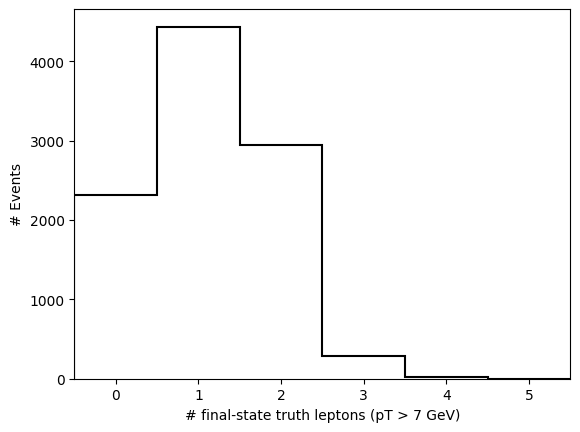

=== BSM Status Statistics ===
Minimum status: 22
Maximum status: 62
Mean status:    24.27
Median status:  22.0
Unique status values and counts:
  Status 22: 40000 entries
  Status 51: 1503 entries
  Status 52: 1512 entries
  Status 62: 230 entries



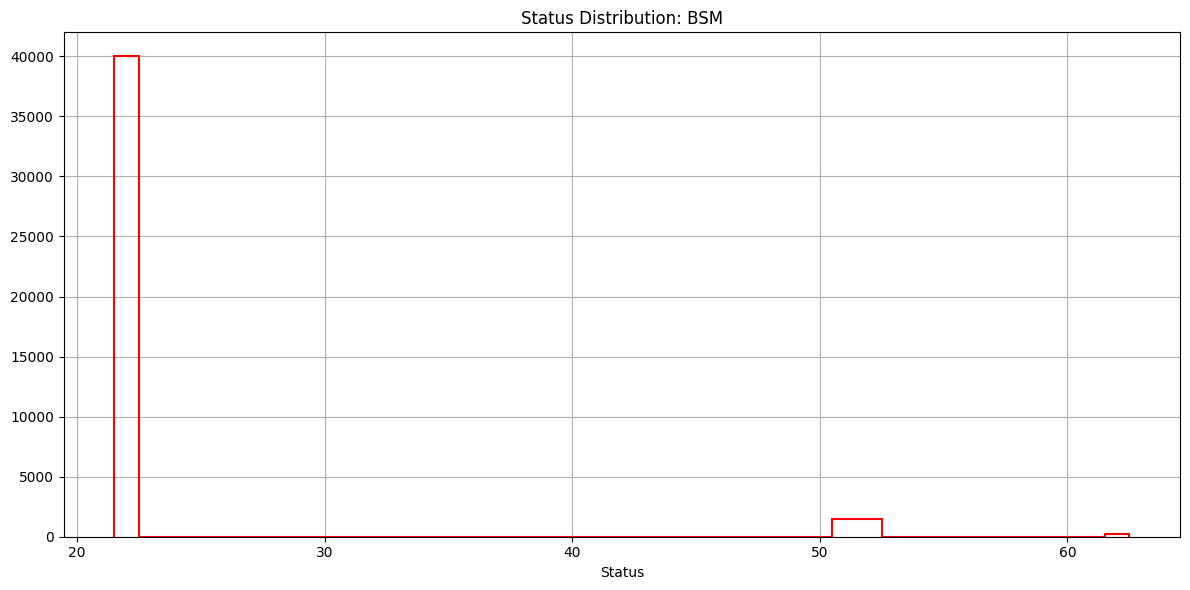

DataFrames summary:
Neutralino 1: (0, 4)
Neutralino 2: (10000, 4)
Chargino pT:
  Count   : 10000
  Min     : 0.98
  Median  : 193.51
  Mean    : 213.12
  Std Dev : 91.09
  Max     : 1063.94

Chargino eta:
  Count   : 10000
  Min     : -5.02
  Median  : -0.01
  Mean    : 0.00
  Std Dev : 1.43
  Max     : 6.63

Chargino phi:
  Count   : 10000
  Min     : -3.14
  Median  : -0.02
  Mean    : -0.01
  Std Dev : 1.80
  Max     : 3.14

Neutralino 1 pT: No entries found.

Neutralino 1 eta: No entries found.

Neutralino 1 phi: No entries found.

Neutralino 2 pT:
  Count   : 10000
  Min     : 2.54
  Median  : 194.69
  Mean    : 213.87
  Std Dev : 91.85
  Max     : 900.39

Neutralino 2 eta:
  Count   : 10000
  Min     : -4.80
  Median  : -0.01
  Mean    : -0.01
  Std Dev : 1.39
  Max     : 4.80

Neutralino 2 phi:
  Count   : 10000
  Min     : -3.14
  Median  : 0.05
  Mean    : 0.01
  Std Dev : 1.82
  Max     : 3.14



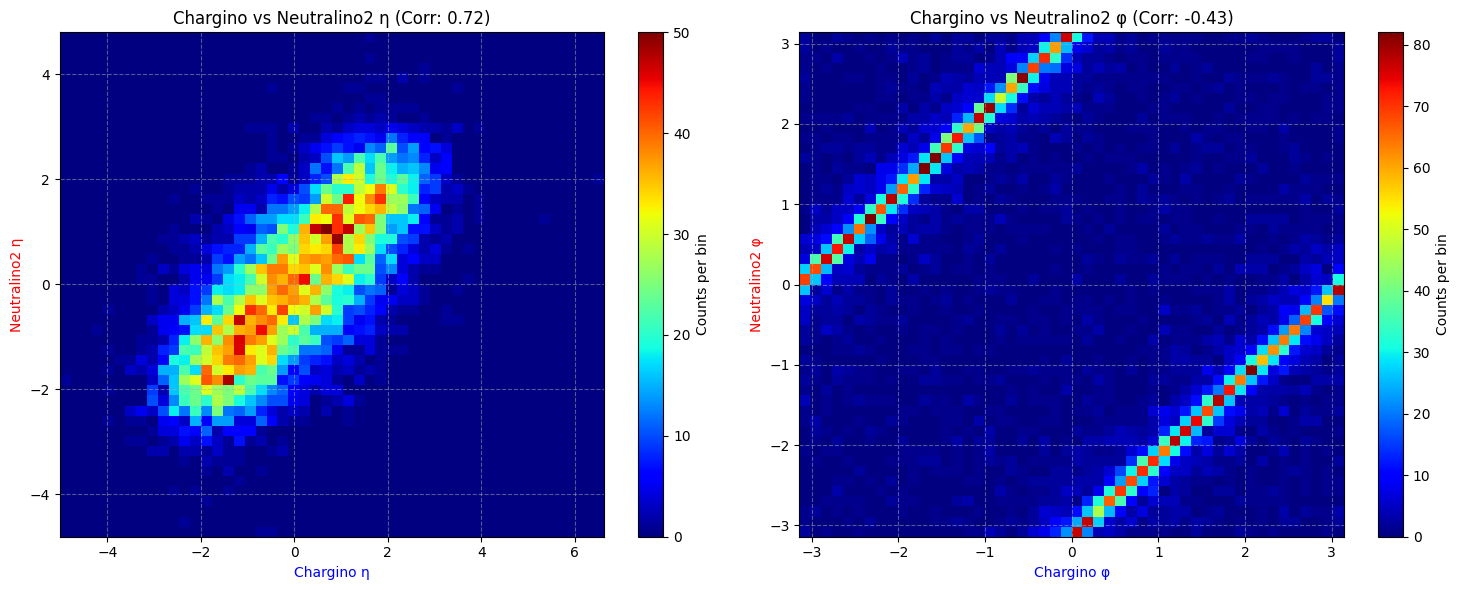

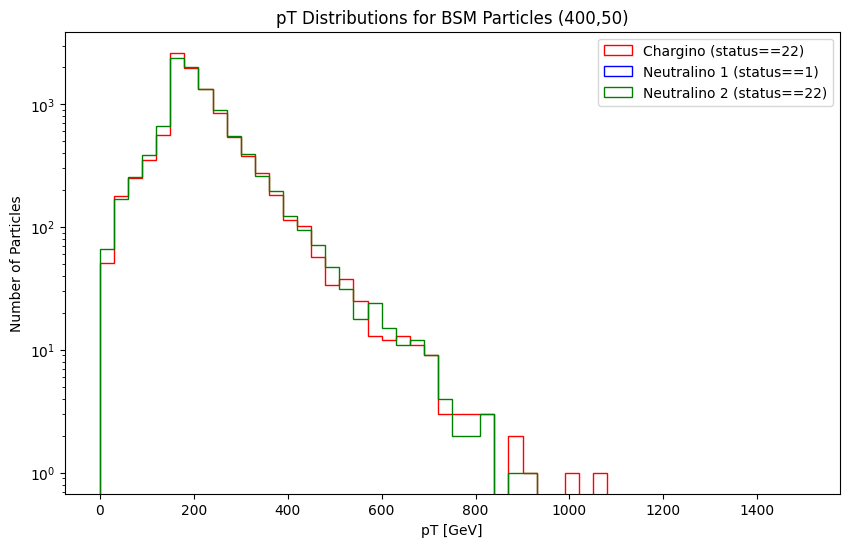

In [6]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import awkward as ak


# Open the ROOT file
file = uproot.open("/Users/ericballabene/mc20_13TeV.546904.MGPy8EG_N2C1m_135_125_2L_MS_noG_uds_N1pT150_rev.deriv.DAOD_PHYS.e8575_s3797_r13144_p6490/DAOD_PHYS.42337311._000002.pool.root.1")

# Specify the tree name
tree_name = "CollectionTree;1"

# Access the tree
tree = file[tree_name]

# List all trees in the file
print("Trees in the file:")
print(file.keys())

# List all branches in the tree
print("Branches in the tree:")
print(tree.keys())

# Check the total number of events
print(f"Total number of events in the tree: {tree.num_entries}")


#-------------------------------------------------------
# arrays we need for electrons, muons
#-------------------------------------------------------
branches_electrons = [
    "TruthElectronsAuxDyn.px",
    "TruthElectronsAuxDyn.py",
    "TruthElectronsAuxDyn.pz",
    "TruthElectronsAuxDyn.e",
    "TruthElectronsAuxDyn.status"
]
branches_muons = [
    "TruthMuonsAuxDyn.px",
    "TruthMuonsAuxDyn.py",
    "TruthMuonsAuxDyn.pz",
    "TruthMuonsAuxDyn.e",
    "TruthMuonsAuxDyn.status"
]

arr_electrons = tree.arrays(branches_electrons, library="ak")
arr_muons     = tree.arrays(branches_muons,     library="ak")

#-------------------------------------------------------
# Compute electron, muon pT in MeV
#-------------------------------------------------------
px_ele = arr_electrons["TruthElectronsAuxDyn.px"]
py_ele = arr_electrons["TruthElectronsAuxDyn.py"]
pt_ele = np.sqrt(px_ele**2 + py_ele**2)

px_mu = arr_muons["TruthMuonsAuxDyn.px"]
py_mu = arr_muons["TruthMuonsAuxDyn.py"]
pt_mu = np.sqrt(px_mu**2 + py_mu**2)

#-------------------------------------------------------
# Require final-state leptons (status==1) with pT > 7 GeV
#-------------------------------------------------------
is_final_ele  = (arr_electrons["TruthElectronsAuxDyn.status"] == 1)
pass_pt_ele   = (pt_ele > 7000)  # in MeV
keep_ele_mask = is_final_ele & pass_pt_ele
#keep_ele_mask = is_final_ele

is_final_mu   = (arr_muons["TruthMuonsAuxDyn.status"] == 1)
pass_pt_mu    = (pt_mu > 7000)   # in MeV
keep_mu_mask  = is_final_mu & pass_pt_mu
#keep_mu_mask  = is_final_mu


#-------------------------------------------------------
# Count leptons per event
#-------------------------------------------------------
n_elec = ak.sum(keep_ele_mask, axis=1)
n_muon = ak.sum(keep_mu_mask,  axis=1)
n_lept = n_elec + n_muon

#-------------------------------------------------------
# Count number of events with 0, 1, 2, 3, 4, and 5+ leptons
#-------------------------------------------------------
n_events = len(n_lept)
n_0lep   = ak.sum(n_lept == 0)
n_1lep   = ak.sum(n_lept == 1)
n_2lep   = ak.sum(n_lept == 2)
n_3lep   = ak.sum(n_lept == 3)
n_4lep   = ak.sum(n_lept == 4)
n_5plus  = ak.sum(n_lept >= 5)

#-------------------------------------------------------
# Print event statistics
#-------------------------------------------------------
print(f"Total events in DAOD:         {n_events}")
print(f"Events with >=2 leptons (pT > 7 GeV): {n_2lep + n_3lep + n_4lep + n_5plus}")
print(f"Fraction passing 2-lepton cut: {100.0 * (n_2lep + n_3lep + n_4lep + n_5plus) / n_events:.2f}%")

print("\nDetailed Breakdown:")
print(f"  Events with  0 leptons: {n_0lep}")
print(f"  Events with  1 lepton : {n_1lep}")
print(f"  Events with  2 leptons: {n_2lep}")
print(f"  Events with  3 leptons: {n_3lep}")
print(f"  Events with  4 leptons: {n_4lep}")
print(f"  Events with  5+ leptons: {n_5plus}")

#-------------------------------------------------------
# Plot histogram of number of leptons per event
#-------------------------------------------------------
n_lept_np = ak.to_numpy(n_lept)

# Define bins for integer counts (ensuring correct placement)
bin_edges = np.arange(-0.5, max(n_lept_np) + 1.5, 1)  

# Create histogram
plt.hist(n_lept_np, bins=bin_edges, histtype='step', color='black', linewidth=1.5)

# Set x-axis ticks to exact integer values
plt.xticks(np.arange(0, max(n_lept_np) + 1, 1))

# Force x-axis and y-axis to start from 0
plt.xlim(-0.5, max(n_lept_np) + 0.5)
plt.ylim(0, None)

# Labels
plt.xlabel("# final-state truth leptons (pT > 7 GeV)")
plt.ylabel("# Events")

# Show plot
plt.show()






#-------------------------------------------------------
# Retrieve the status branches for bosons and BSM particles.
#
# For bosons, we use the branch from TruthBosonAuxDyn.
# For BSM particles, we use the branch from TruthBSMAuxDyn.
#-------------------------------------------------------
#branches_bos = ["TruthBosonAuxDyn.status"]
branches_bsm = ["TruthBSMAuxDyn.status"]

# Read the branches into awkward arrays.
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

#-------------------------------------------------------
# Flatten the jagged arrays to get one-dimensional arrays.
#-------------------------------------------------------
#status_bos = ak.flatten(arr_bos["TruthBosonAuxDyn.status"])
status_bsm = ak.flatten(arr_bsm["TruthBSMAuxDyn.status"])

# Convert the flattened arrays to NumPy arrays.
#status_bos_np = ak.to_numpy(status_bos)
status_bsm_np = ak.to_numpy(status_bsm)

#-------------------------------------------------------
# Compute basic statistics for the status arrays.
#-------------------------------------------------------
def print_statistics(name, array):
    unique_vals, counts = np.unique(array, return_counts=True)
    print(f"=== {name} Status Statistics ===")
    print(f"Minimum status: {np.min(array)}")
    print(f"Maximum status: {np.max(array)}")
    print(f"Mean status:    {np.mean(array):.2f}")
    print(f"Median status:  {np.median(array)}")
    print("Unique status values and counts:")
    for val, count in zip(unique_vals, counts):
        print(f"  Status {val}: {count} entries")
    print("")

#print_statistics("Boson", status_bos_np)
print_statistics("BSM", status_bsm_np)

#-------------------------------------------------------
# Plot the status distributions.
#-------------------------------------------------------
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6), sharey=True)

bins_bsm = np.arange(np.min(status_bsm_np) - 0.5, np.max(status_bsm_np) + 1.5, 1)
ax1.hist(status_bsm_np, bins=bins_bsm, histtype='step', color='red', linewidth=1.5)
ax1.set_title("Status Distribution: BSM")
ax1.set_xlabel("Status")
ax1.grid(True)

plt.tight_layout()
plt.show()



branches_bsm = [
    "TruthBSMAuxDyn.pdgId",
    "TruthBSMAuxDyn.px",
    "TruthBSMAuxDyn.py",
    "TruthBSMAuxDyn.pz",     
    "TruthBSMAuxDyn.status"
]

# --- Read branches using uproot ---
#arr_bos = tree.arrays(branches_bos, library="ak")
arr_bsm = tree.arrays(branches_bsm, library="ak")

###########################
# Process BSM Data
###########################
# Compute transverse momentum (pT) in GeV for BSM:
pt_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                 arr_bsm["TruthBSMAuxDyn.py"]**2) / 1000.0

# Compute total momentum p (in GeV) for BSM:
p_bsm = np.sqrt(arr_bsm["TruthBSMAuxDyn.px"]**2 +
                arr_bsm["TruthBSMAuxDyn.py"]**2 +
                arr_bsm["TruthBSMAuxDyn.pz"]**2) / 1000.0

# Convert pz to GeV for BSM:
pz_bsm = arr_bsm["TruthBSMAuxDyn.pz"] / 1000.0

# Compute pseudorapidity (eta) for BSM:
eta_bsm = 0.5 * np.log((p_bsm + pz_bsm) / (p_bsm - pz_bsm))

# Compute azimuthal angle (phi) for BSM:
phi_bsm = np.arctan2(arr_bsm["TruthBSMAuxDyn.py"], arr_bsm["TruthBSMAuxDyn.px"])

# Flatten and convert BSM arrays to NumPy:
pdg_bsm_np    = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.pdgId"]))
status_bsm_np = ak.to_numpy(ak.flatten(arr_bsm["TruthBSMAuxDyn.status"]))
pt_bsm_np     = ak.to_numpy(ak.flatten(pt_bsm))
eta_bsm_np    = ak.to_numpy(ak.flatten(eta_bsm))
phi_bsm_np    = ak.to_numpy(ak.flatten(phi_bsm))

# Define masks for each BSM particle type based on PDG ID and status:
mask_chargino    = (np.abs(pdg_bsm_np) == 1000024) & (status_bsm_np == 22)
mask_neutralino1 = (np.abs(pdg_bsm_np) == 1000022) & (status_bsm_np == 1)
mask_neutralino2 = (np.abs(pdg_bsm_np) == 1000023) & (status_bsm_np == 22)

bsm_chargino    = {
    "pdgId": pdg_bsm_np[mask_chargino],
    "pt": pt_bsm_np[mask_chargino],
    "eta": eta_bsm_np[mask_chargino],
    "phi": phi_bsm_np[mask_chargino]
}
bsm_neutralino1 = {
    "pdgId": pdg_bsm_np[mask_neutralino1],
    "pt": pt_bsm_np[mask_neutralino1],
    "eta": eta_bsm_np[mask_neutralino1],
    "phi": phi_bsm_np[mask_neutralino1]
}
bsm_neutralino2 = {
    "pdgId": pdg_bsm_np[mask_neutralino2],
    "pt": pt_bsm_np[mask_neutralino2],
    "eta": eta_bsm_np[mask_neutralino2],
    "phi": phi_bsm_np[mask_neutralino2]
}


df_bsm_chargino_400_50 = pd.DataFrame(bsm_chargino)
df_bsm_neutralino1_400_50 = pd.DataFrame(bsm_neutralino1)
df_bsm_neutralino2_400_50 = pd.DataFrame(bsm_neutralino2)

print("DataFrames summary:")
print("Neutralino 1:", df_bsm_neutralino1_400_50.shape)
print("Neutralino 2:", df_bsm_neutralino2_400_50.shape)


def print_detailed_stats(label, array):
    if len(array) > 0:
        count = len(array)
        mn = np.min(array)
        med = np.median(array)
        mean = np.mean(array)
        std = np.std(array)
        mx = np.max(array)
        print(f"{label}:")
        print(f"  Count   : {count}")
        print(f"  Min     : {mn:.2f}")
        print(f"  Median  : {med:.2f}")
        print(f"  Mean    : {mean:.2f}")
        print(f"  Std Dev : {std:.2f}")
        print(f"  Max     : {mx:.2f}\n")
    else:
        print(f"{label}: No entries found.\n")
# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")
# Extract eta and phi for Chargino and Neutralino2
eta_chargino = df_bsm_chargino_400_50["eta"].values[:n_pairs_BSM]
eta_neu2 = df_bsm_neutralino2_400_50["eta"].values[:n_pairs_BSM]
phi_chargino = df_bsm_chargino_400_50["phi"].values[:n_pairs_BSM]
phi_neu2 = df_bsm_neutralino2_400_50["phi"].values[:n_pairs_BSM]

corr_eta_BSM = np.corrcoef(eta_chargino, eta_neu2)[0, 1]
corr_phi_BSM = np.corrcoef(phi_chargino, phi_neu2)[0, 1]

print_detailed_stats("Chargino pT", df_bsm_chargino_400_50["pt"])
print_detailed_stats("Chargino eta", df_bsm_chargino_400_50["eta"])
print_detailed_stats("Chargino phi", df_bsm_chargino_400_50["phi"])

print_detailed_stats("Neutralino 1 pT", df_bsm_neutralino1_400_50["pt"])
print_detailed_stats("Neutralino 1 eta", df_bsm_neutralino1_400_50["eta"])
print_detailed_stats("Neutralino 1 phi", df_bsm_neutralino1_400_50["phi"])

print_detailed_stats("Neutralino 2 pT", df_bsm_neutralino2_400_50["pt"])
print_detailed_stats("Neutralino 2 eta", df_bsm_neutralino2_400_50["eta"])
print_detailed_stats("Neutralino 2 phi", df_bsm_neutralino2_400_50["phi"])

# --- Plot histograms for bosons and BSM particles ---

# For Chargino and Neutralino2, use the minimum available pairs
n_pairs_BSM = min(len(df_bsm_chargino_400_50), len(df_bsm_neutralino2_400_50))
if n_pairs_BSM == 0:
    raise ValueError("Not enough paired data for Chargino and Neutralino2.")


# --- Create subplots ---
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between plots

# Bottom Left: 2D Histogram for Chargino η vs Neutralino2 η
im2 = axs[0].hist2d(eta_chargino, eta_neu2, bins=50, cmap='jet', density=False)
cbar2 = fig.colorbar(im2[3], ax=axs[0])
cbar2.set_label("Counts per bin")
axs[0].set_xlabel("Chargino η", color='blue')
axs[0].set_ylabel("Neutralino2 η", color='red')
axs[0].set_title(f"Chargino vs Neutralino2 η (Corr: {corr_eta_BSM:.2f})")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Bottom Right: 2D Histogram for Chargino φ vs Neutralino2 φ
im3 = axs[1].hist2d(phi_chargino, phi_neu2, bins=50, cmap='jet', density=False)
cbar3 = fig.colorbar(im3[3], ax=axs[1])
cbar3.set_label("Counts per bin")
axs[1].set_xlabel("Chargino φ", color='blue')
axs[1].set_ylabel("Neutralino2 φ", color='red')
axs[1].set_title(f"Chargino vs Neutralino2 φ (Corr: {corr_phi_BSM:.2f})")
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
plt.hist(df_bsm_chargino_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='red', label="Chargino (status==22)")
plt.hist(df_bsm_neutralino1_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='blue', label="Neutralino 1 (status==1)")
plt.hist(df_bsm_neutralino2_400_50["pt"], bins=50, range=(0,1500), histtype='step', color='green', label="Neutralino 2 (status==22)")
plt.xlabel('pT [GeV]')
plt.ylabel('Number of Particles')
plt.title('pT Distributions for BSM Particles (400,50)')
plt.yscale('log')
plt.legend()
plt.show()